In [ ]:
!pip install seaborn

     |████████████████████████████████| 283 kB 17.3 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 13.7 MB/s 
     |████████████████████████████████| 231 kB 66.2 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
plt.style.use('fivethirtyeight')

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('default')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'light'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [ ]:
df.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946     401.26706     37.328178   
min        0.000000      0.000000       0.000000       0.00000   1196.000000   
25%        1.000000      1.000000     224.000000     102.00000   1940.000000   
50%        2.000000      2.000000     521.000000     136.00000   1970.000000   
75%        2.000000      2.000000     670.000000     188.00000   2000.000000   
max       12.000000     26.000000  433014.000000   44515.00000   2106.000000   

          Lattitude    Longtitude  Propertycount  
count  26881.000000  26881.000000   34854.000000  
mean     -37.810634    145.001851    7572.888306  
std        0.090279      0.120169    4428.090313  
min      -38.190430    144.423790      83.000000  
25%      -37.862950    144.933500    4385.000000  
50%      -37.807600    145.007800    6763.000000  
75%      -37.754100    145.071900   10412.000000  
max      -37.390200    145.526350   21650.000000

In [ ]:
df[df.Bedroom2==30]

Suburb        Address  Rooms Type  Price Method SellerG       Date  \
2536  Burwood  36 Cumming St      3    h    NaN     PI    Ross  8/10/2016   

      Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
2536      11.7    3125.0  ...      12.0  0.0     946.0           NaN   

      YearBuilt          CouncilArea Lattitude  Longtitude  \
2536     1950.0  Monash City Council   -37.853    145.1129   

                 Regionname Propertycount  
2536  Southern Metropolitan        5678.0  

[1 rows x 21 columns]

In [ ]:
df[df.Bathroom==12]

Suburb        Address  Rooms Type  Price Method SellerG       Date  \
2536  Burwood  36 Cumming St      3    h    NaN     PI    Ross  8/10/2016   

      Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
2536      11.7    3125.0  ...      12.0  0.0     946.0           NaN   

      YearBuilt          CouncilArea Lattitude  Longtitude  \
2536     1950.0  Monash City Council   -37.853    145.1129   

                 Regionname Propertycount  
2536  Southern Metropolitan        5678.0  

[1 rows x 21 columns]

In [ ]:
df[df.YearBuilt>2020] #recording mistake, YearBuilt should be 2016 instead of 2106.

Suburb       Address  Rooms Type  Price Method SellerG       Date  \
2453  Bulleen  3 Maringa St      4    h    NaN     SP     Ray  7/11/2016   

      Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
2453      11.8    3105.0  ...       2.0  2.0     729.0         255.0   

      YearBuilt              CouncilArea Lattitude  Longtitude  \
2453     2106.0  Manningham City Council  -37.7637    145.0881   

                Regionname Propertycount  
2453  Eastern Metropolitan        4480.0  

[1 rows x 21 columns]

In [ ]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df_with_infl_pt=df.copy()

In [ ]:
df.shape, df_with_infl_pt.shape, id(df),id(df_with_infl_pt)

((8887, 21), (8887, 21), 140177111041424, 140177116909200)

## Explanatory Analysis

In [ ]:
df.head()

Suburb          Address  Rooms Type      Price Method SellerG  \
2   Abbotsford  25 Bloomburg St      2    h  1035000.0      S  Biggin   
4   Abbotsford     5 Charles St      3    h  1465000.0     SP  Biggin   
6   Abbotsford      55a Park St      4    h  1600000.0     VB  Nelson   
11  Abbotsford     124 Yarra St      3    h  1876000.0      S  Nelson   
14  Abbotsford    98 Charles St      2    h  1636000.0      S  Nelson   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
2   4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
4   4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
6   4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   
11  7/05/2016       2.5    3067.0  ...       2.0  0.0     245.0         210.0   
14  8/10/2016       2.5    3067.0  ...       1.0  2.0     256.0         107.0   

    YearBuilt         CouncilArea Lattitude  Longtitude  \
2      1900.0  Yarra City Council  -37.8079    144.9934   
4      1900.0  Yarra City Council  -37.8093    144.9944   
6      2014.0  Yarra City Council  -37.8072    144.9941   
11     1910.0  Yarra City Council  -37.8024    144.9993   
14     1890.0  Yarra City Council  -37.8060    144.9954   

               Regionname Propertycount  
2   Northern Metropolitan        4019.0  
4   Northern Metropolitan        4019.0  
6   Northern Metropolitan        4019.0  
11  Northern Metropolitan        4019.0  
14  Northern Metropolitan        4019.0  

[5 rows x 21 columns]

## Regression Analysis

In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Model Diagonosis/Evaluation



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

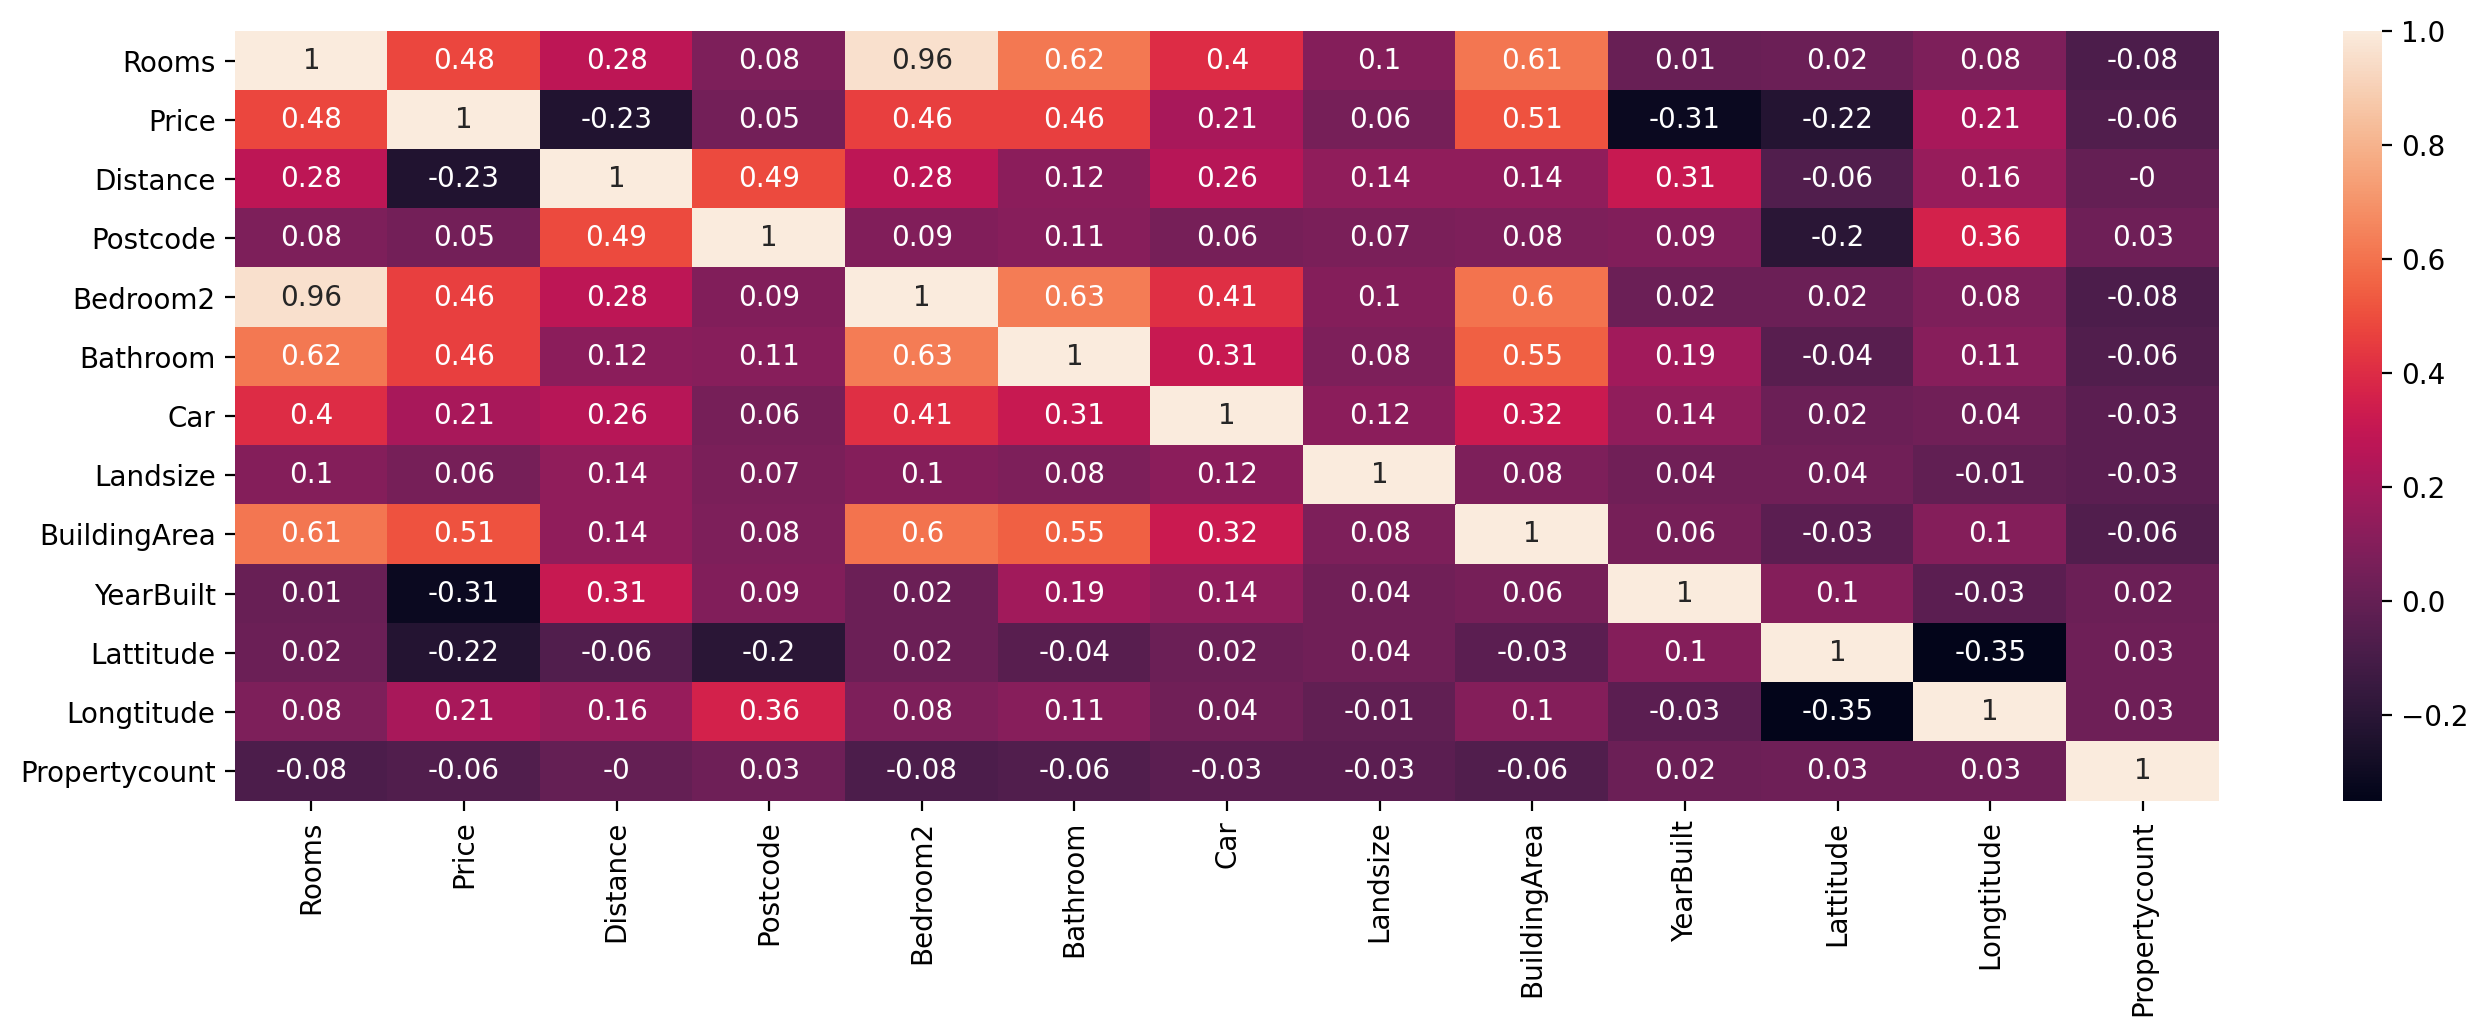

In [ ]:
#checking multicollinearity

import seaborn as sns
correlation_matrix = df.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)
#only numeric variables show up

In [ ]:
correlation_matrix.style.apply(lambda x: ["background: yellow" if v>0.8 and v!=1 else "" for v in x],axis=0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 2 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8887 non-null   object 
 1   Address        8887 non-null   object 
 2   Rooms          8887 non-null   int64  
 3   Type           8887 non-null   object 
 4   Price          8887 non-null   float64
 5   Method         8887 non-null   object 
 6   SellerG        8887 non-null   object 
 7   Date           8887 non-null   object 
 8   Distance       8887 non-null   float64
 9   Postcode       8887 non-null   float64
 10  Bedroom2       8887 non-null   float64
 11  Bathroom       8887 non-null   float64
 12  Car            8887 non-null   float64
 13  Landsize       8887 non-null   float64
 14  BuildingArea   8887 non-null   float64
 15  YearBuilt      8887 non-null   float64
 16  CouncilArea    8887 non-null   object 
 17  Lattitude      8887 non-null   float64
 18  Longtit

In [ ]:
#checking multicollinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

#with Rooms
full_model='Price~Rooms+C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+Longtitude+ C(Regionname)+Propertycount'

# Note: full_model is without Address, Postcode (nominal variable),Suburb (can use Regionname instead),
#SellerG,Date, CouncilArea (since too many levels in the categorical variable)

#professor's conversation with victor in the slack channel said to have ~5 or less levels in categorical variables

#regionname has 7 levels.(still included because it can influence price)

y, X = dmatrices(full_model, data=df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
vif["features"] = X.columns
vif


# we can see rooms and bedroom have VIF >10 so there is high multicollinearity for those 2 variables.
# in practice, VIF<10 is ok based on lecture 7 part a. so For Regionname, Northern Metropolitan, Southern Metropolitan,
#Western Metro has moderate multicolinearity since 4<VIFj<10.


VIF Factor                                     features
0   6220025.25                                    Intercept
1         1.29                                 C(Type)[T.t]
2         1.88                                 C(Type)[T.u]
3         2.32                               C(Method)[T.S]
4         1.06                              C(Method)[T.SA]
5         1.94                              C(Method)[T.SP]
6         1.62                              C(Method)[T.VB]
7         1.29            C(Regionname)[T.Eastern Victoria]
8         4.85       C(Regionname)[T.Northern Metropolitan]
9         1.38           C(Regionname)[T.Northern Victoria]
10        2.22  C(Regionname)[T.South-Eastern Metropolitan]
11        3.87       C(Regionname)[T.Southern Metropolitan]
12        6.70        C(Regionname)[T.Western Metropolitan]
13        1.54            C(Regionname)[T.Western Victoria]
14       15.00                                        Rooms
15        2.44                                     Distance
16       14.75                                     Bedroom2
17        2.02                                     Bathroom
18        1.28                                          Car
19        1.07                                     Landsize
20        1.79                                 BuildingArea
21        1.63                                    YearBuilt
22        2.78                                    Lattitude
23        3.88                                   Longtitude
24        1.14                                Propertycount

In [ ]:
#without Rooms
full_model='Price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+Longtitude+ C(Regionname)+ Propertycount'


y, X = dmatrices(full_model, data=df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

#After removing Rooms, all predictors have VIF < 10.

VIF Factor                                     features
0   6218506.24                                    Intercept
1         1.29                                 C(Type)[T.t]
2         1.86                                 C(Type)[T.u]
3         2.32                               C(Method)[T.S]
4         1.06                              C(Method)[T.SA]
5         1.94                              C(Method)[T.SP]
6         1.62                              C(Method)[T.VB]
7         1.29            C(Regionname)[T.Eastern Victoria]
8         4.85       C(Regionname)[T.Northern Metropolitan]
9         1.38           C(Regionname)[T.Northern Victoria]
10        2.22  C(Regionname)[T.South-Eastern Metropolitan]
11        3.87       C(Regionname)[T.Southern Metropolitan]
12        6.69        C(Regionname)[T.Western Metropolitan]
13        1.54            C(Regionname)[T.Western Victoria]
14        2.44                                     Distance
15        2.62                                     Bedroom2
16        2.01                                     Bathroom
17        1.28                                          Car
18        1.07                                     Landsize
19        1.76                                 BuildingArea
20        1.63                                    YearBuilt
21        2.78                                    Lattitude
22        3.88                                   Longtitude
23        1.14                                Propertycount

In [ ]:
#fit initial model1_0  (with influential points and before transformation) 
#without Rooms (due to multicolinearity), 
#without Address,Postcode(nominal variable),Suburb,SellerG,Date, 
# CouncilArea (since too many levels in the categorical variable)

#professor's conversation with victor in the slack channel said have ~5 or less levels in categorical variables
#full_model here has at least 3 categorical and 3 numerical


full_model='Price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+Longtitude+ C(Regionname)+ Propertycount'
model =smf.ols(full_model,data=df).fit()
model_with_infl=model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     704.4
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:14:25   Log-Likelihood:            -1.2733e+05
No. Observations:                8887   AIC:                         2.547e+05
Df Residuals:                    8863   BIC:                         2.549e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                   -7.042e+07   1.07e+07     -6.581      0.000   -9.14e+07   -4.94e+07
C(Type)[T.t]                                -1.818e+05   1.78e+04    -10.206      0.000   -2.17e+05   -1.47e+05
C(Type)[T.u]                                -3.921e+05   1.55e+04    -25.336      0.000   -4.22e+05   -3.62e+05
C(Method)[T.S]                               6.037e+04   1.35e+04      4.456      0.000    3.38e+04    8.69e+04
C(Method)[T.SA]                              1.213e+04   5.26e+04      0.230      0.818   -9.11e+04    1.15e+05
C(Method)[T.SP]                              3.966e+04   1.69e+04      2.341      0.019    6456.741    7.29e+04
C(Method)[T.VB]                              3.726e+04   1.86e+04      2.003      0.045     789.954    7.37e+04
C(Regionname)[T.Eastern Victoria]            1.604e+05   6.46e+04      2.483      0.013    3.37e+04    2.87e+05
C(Regionname)[T.Northern Metropolitan]      -1.415e+05   2.07e+04     -6.826      0.000   -1.82e+05   -1.01e+05
C(Regionname)[T.Northern Victoria]           3.101e+05   6.06e+04      5.121      0.000    1.91e+05    4.29e+05
C(Regionname)[T.South-Eastern Metropolitan]  1.168e+05   3.19e+04      3.658      0.000    5.42e+04    1.79e+05
C(Regionname)[T.Southern Metropolitan]       2.784e+05   1.84e+04     15.170      0.000    2.42e+05    3.14e+05
C(Regionname)[T.Western Metropolitan]       -1.634e+05   2.63e+04     -6.211      0.000   -2.15e+05   -1.12e+05
C(Regionname)[T.Western Victoria]            2.782e+05   7.68e+04      3.622      0.000    1.28e+05    4.29e+05
Distance                                    -3.867e+04    983.077    -39.337      0.000   -4.06e+04   -3.67e+04
Bedroom2                                     1.083e+05   7184.614     15.077      0.000    9.42e+04    1.22e+05
Bathroom                                     1.852e+05   8437.429     21.953      0.000    1.69e+05    2.02e+05
Car                                          4.815e+04   4981.482      9.666      0.000    3.84e+04    5.79e+04
Landsize                                       27.5869      4.176      6.606      0.000      19.401      35.773
BuildingArea                                 1734.8003     64.772     26.783      0.000    1607.832    1861.769
YearBuilt                                   -3105.6330    147.964    -20.989      0.000   -3395.677   -2815.589
Lattitude                                   -4.353e+05    7.9e+04     -5.513      0.000    -5.9e+05   -2.81e+05
Longtitude                                    4.18e+05    7.1e+04      5.884      0.000    2.79e+05    5.57e+05
Propertycount                                   1.7058      1.047      1.629      0.103      -0.346       3.758
===========================================================

In [ ]:
# for initial model 1_0(with influential points and before transformation) 
#, below cells will be checking the following:

#check normality Omnibus:	6538.718. Jarque-Bera (JB):	493185.215 very high.
# check heterosced
#check linearity

In [ ]:
#checking Heteroscedasticity

#Breusch-Pagan is for "systematic" Heteroscedasticity. A random pattern coudl pass BP test
#so also need to do residual plot.
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

#BP p-value 8.26e-135 for model1_0 with infl pt and before transform

{'LM Statistic': 708.212931564411, 'LM-Test p-value': 8.259041186916135e-135}


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


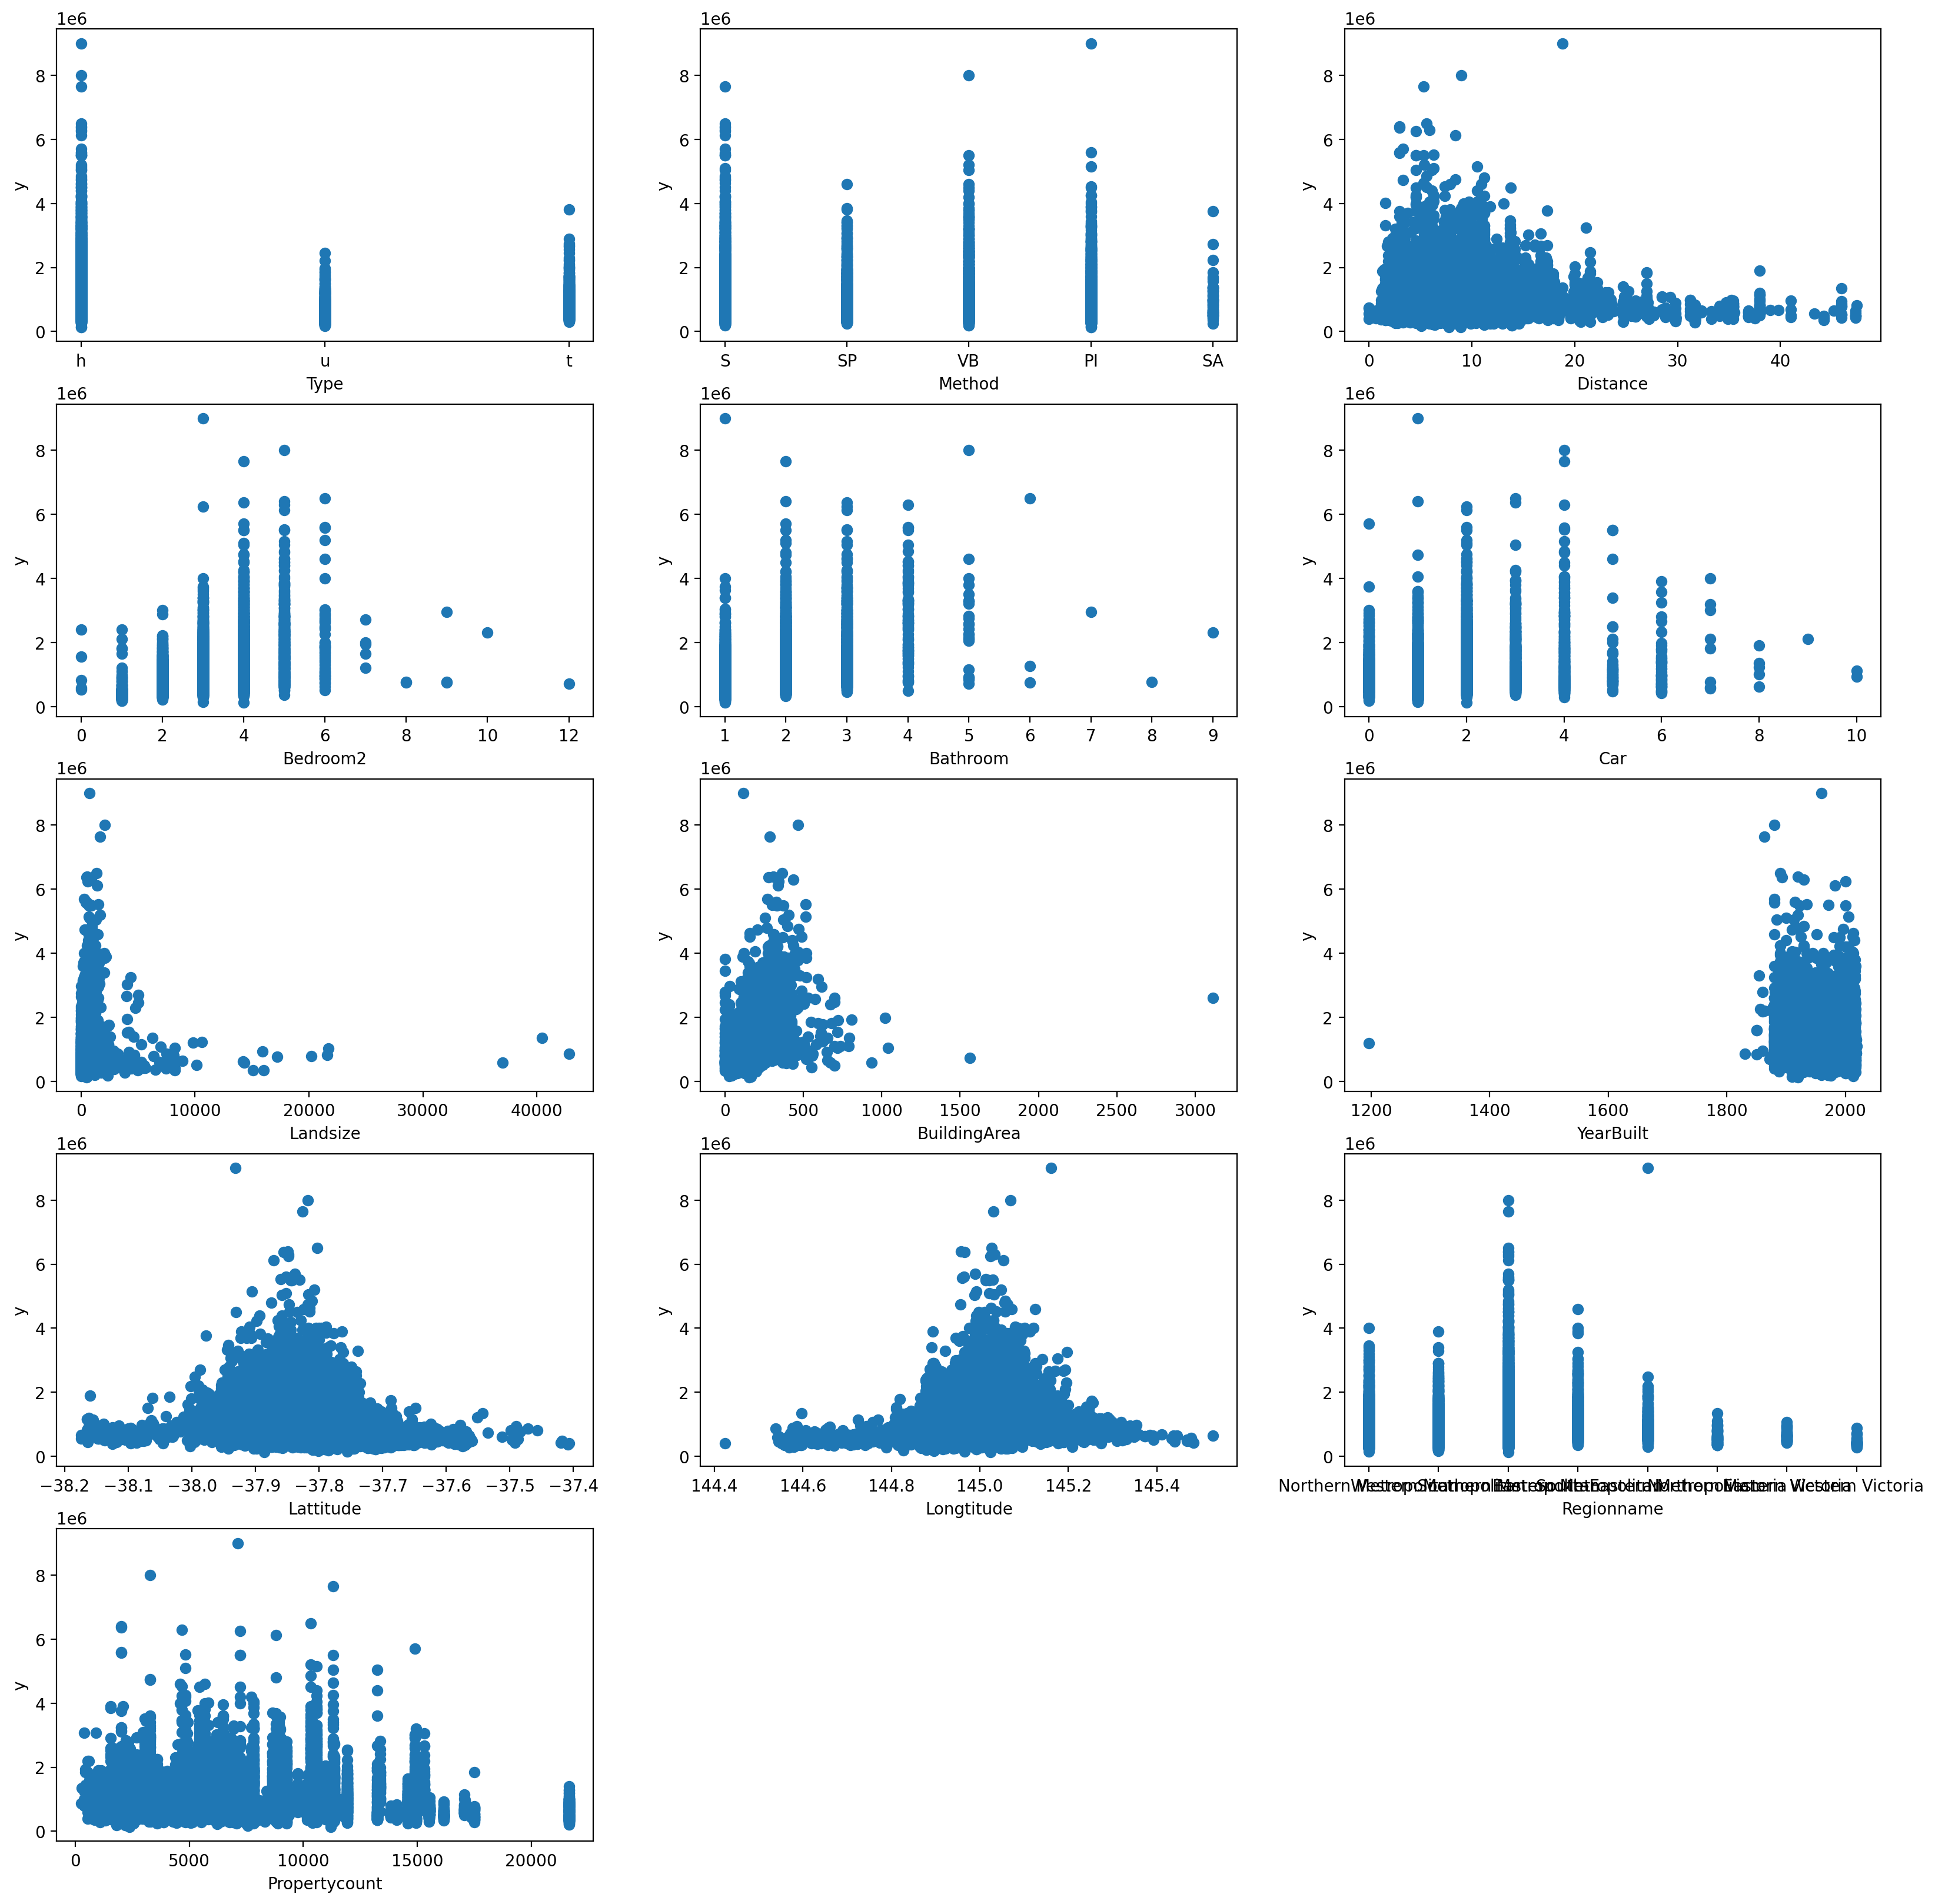

In [ ]:
#checking nonlinearity
#with influential points, before transform

#in the pdf, the sns.pairplot may be too small to read. so use professor's method for generating
#grid of plots

#before log transform of y
predictor=df[['Type', 'Method', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']]
plt.figure(figsize=(20,20)) 
for i, col in enumerate(predictor.columns):
    plt.subplot(5, 3, i+1)
    x = predictor[col]
    y = df.Price
    plt.plot(x, y, 'o' )
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('y')

#check linearity assumption based on y vs predictor scatterplot.  
#comments: all plots look nonlinear. Can see possible influential points in Landsize, BuildingArea,
#YearBuilt,

In [ ]:
# determining influential points
n=df.shape[0]
cook_threshold=4/n
cook_threshold,n

(0.0004500956453246315, 8887)

In [ ]:
# Influential points
#object for the analysis of influential points
infl = model.get_influence()


In [ ]:
infl_pt=infl.cooks_distance[0] >= cook_threshold
infl_pt_idx=df.index[infl_pt]
len(infl_pt_idx),infl_pt_idx

(390,
 Int64Index([  135,   166,   178,   202,   284,   426,   465,   466,   468,
               616,
             ...
             34055, 34189, 34329, 34340, 34494, 34496, 34498, 34508, 34542,
             34591],
            dtype='int64', length=390))

In [ ]:
n-len(infl_pt_idx) #num of data points without influential points

8497

In [ ]:
bad_df=df.index.isin(infl_pt_idx)
df_without_infl_pt=df[~bad_df]#.shape
df_without_infl_pt.shape


(8497, 21)

In [ ]:
infl_data = df.loc[infl_pt_idx]

In [ ]:
#fit initial model1_1 without 390 influential points
# R-squared=0.756 with influential points. R-squared from above. model1_0
# R-squared =0.756 without influential points.  model1_1
#Getting rid of influential points leads to better fit.
full_model='Price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+Longtitude+ C(Regionname)+ Propertycount'
model =smf.ols(full_model,data=df_without_infl_pt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     1140.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:14:28   Log-Likelihood:            -1.1823e+05
No. Observations:                8497   AIC:                         2.365e+05
Df Residuals:                    8473   BIC:                         2.367e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                   -1.135e+08   7.49e+06    -15.149      0.000   -1.28e+08   -9.88e+07
C(Type)[T.t]                                 -1.27e+05   1.22e+04    -10.447      0.000   -1.51e+05   -1.03e+05
C(Type)[T.u]                                -3.286e+05   1.06e+04    -30.900      0.000   -3.49e+05   -3.08e+05
C(Method)[T.S]                               6.195e+04   9186.653      6.744      0.000    4.39e+04       8e+04
C(Method)[T.SA]                              3.187e+04   4.32e+04      0.738      0.461   -5.28e+04    1.17e+05
C(Method)[T.SP]                               3.22e+04   1.14e+04      2.814      0.005    9771.372    5.46e+04
C(Method)[T.VB]                              1.776e+04   1.27e+04      1.399      0.162   -7130.802    4.27e+04
C(Regionname)[T.Eastern Victoria]            1.991e+04   4.69e+04      0.424      0.671   -7.21e+04    1.12e+05
C(Regionname)[T.Northern Metropolitan]      -6.764e+04   1.41e+04     -4.790      0.000   -9.53e+04      -4e+04
C(Regionname)[T.Northern Victoria]            3.07e+05   4.89e+04      6.280      0.000    2.11e+05    4.03e+05
C(Regionname)[T.South-Eastern Metropolitan]  1.392e+04   2.17e+04      0.641      0.521   -2.87e+04    5.65e+04
C(Regionname)[T.Southern Metropolitan]       2.207e+05   1.25e+04     17.666      0.000    1.96e+05    2.45e+05
C(Regionname)[T.Western Metropolitan]       -7.225e+04    1.8e+04     -4.009      0.000   -1.08e+05   -3.69e+04
C(Regionname)[T.Western Victoria]            3.895e+05   5.59e+04      6.968      0.000     2.8e+05    4.99e+05
Distance                                    -3.445e+04    689.591    -49.959      0.000   -3.58e+04   -3.31e+04
Bedroom2                                     8.056e+04   5240.364     15.373      0.000    7.03e+04    9.08e+04
Bathroom                                     1.027e+05   6256.649     16.417      0.000    9.05e+04    1.15e+05
Car                                          2.878e+04   3516.210      8.184      0.000    2.19e+04    3.57e+04
Landsize                                       33.7953      5.274      6.407      0.000      23.456      44.134
BuildingArea                                 2753.0500     68.234     40.347      0.000    2619.296    2886.805
YearBuilt                                   -3122.2014    107.194    -29.127      0.000   -3332.328   -2912.075
Lattitude                                   -6.458e+05   5.43e+04    -11.900      0.000   -7.52e+05   -5.39e+05
Longtitude                                   6.601e+05   4.95e+04     13.345      0.000    5.63e+05    7.57e+05
Propertycount                                   1.0120      0.707      1.431      0.152      -0.374       2.398
===========================================================

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


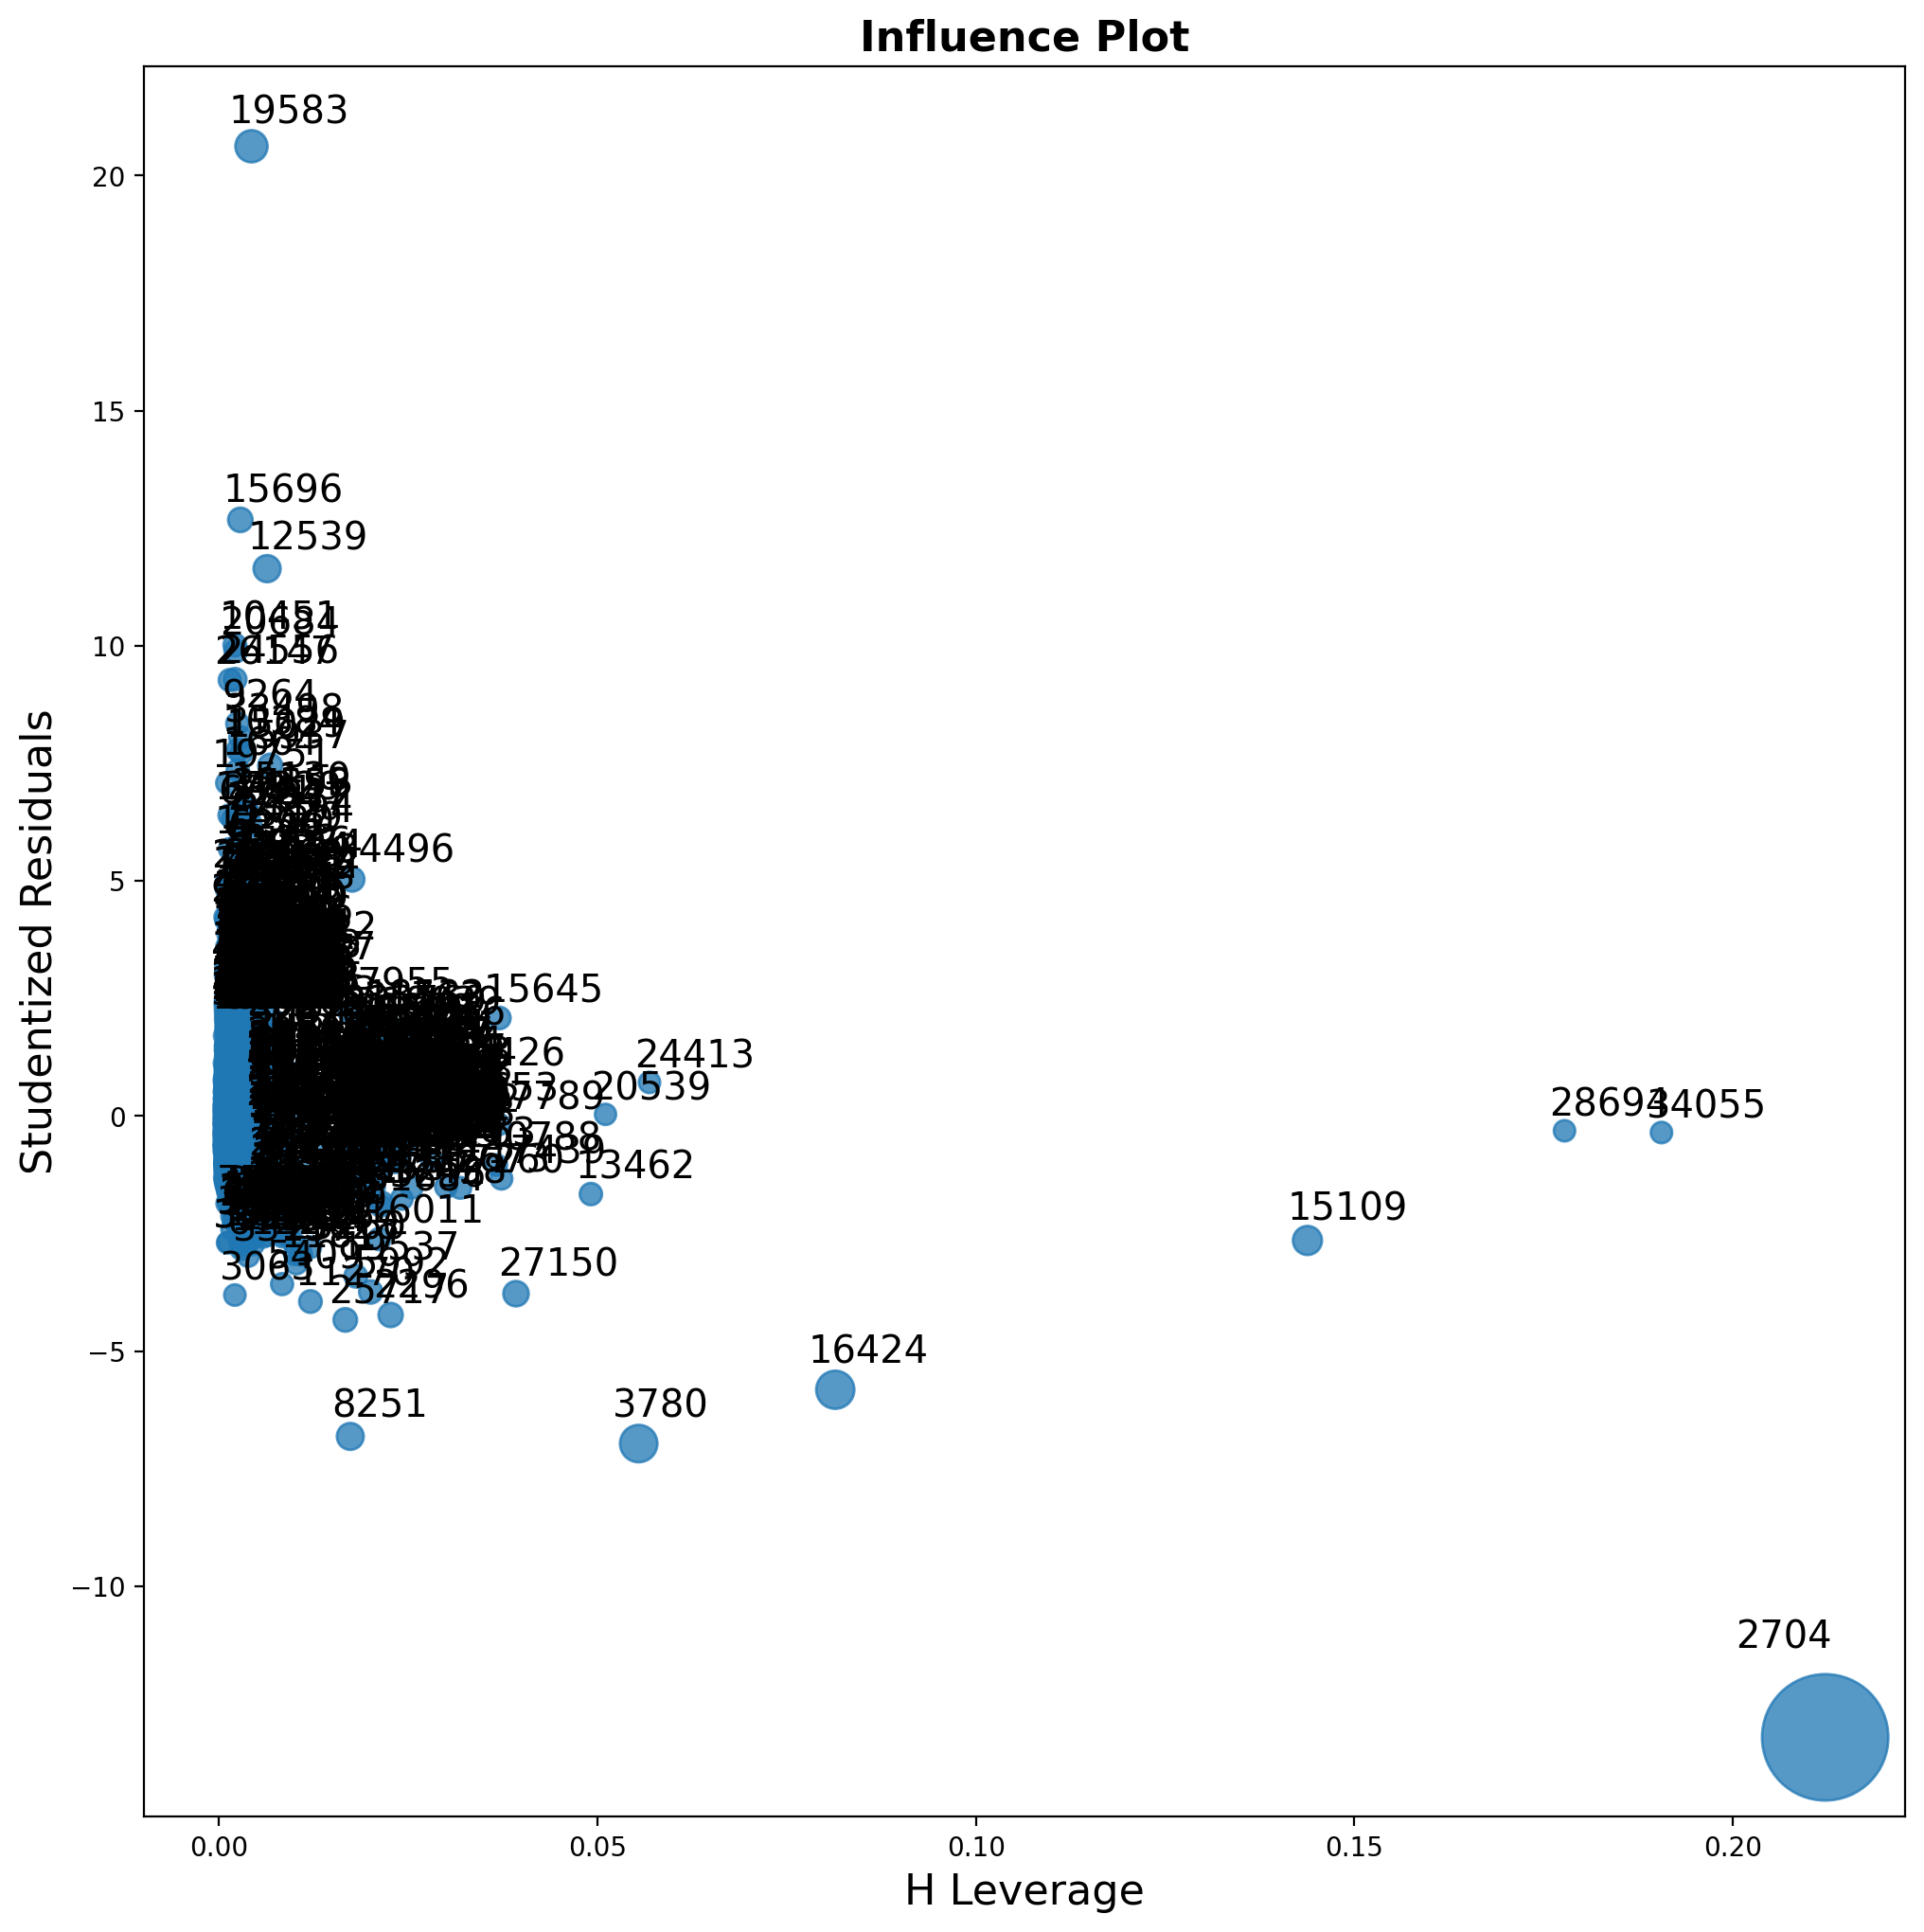

In [ ]:
#this plot below with influential points

#graphical representation of the influences()
#size of points are given by cook's dist value

infl = model_with_infl.get_influence()


fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model_with_infl,ax=ax, criterion="cooks") 

#took ~6 minutes to run when we have tens of predictors vs hundreds of predictors
# if it took longer to run, can take a nongraphical approach with
# cooks distance above since influence plot took forever and 
# code never finished computing

#comment: look at the scale of the x and y axis. before and after remove influential points.



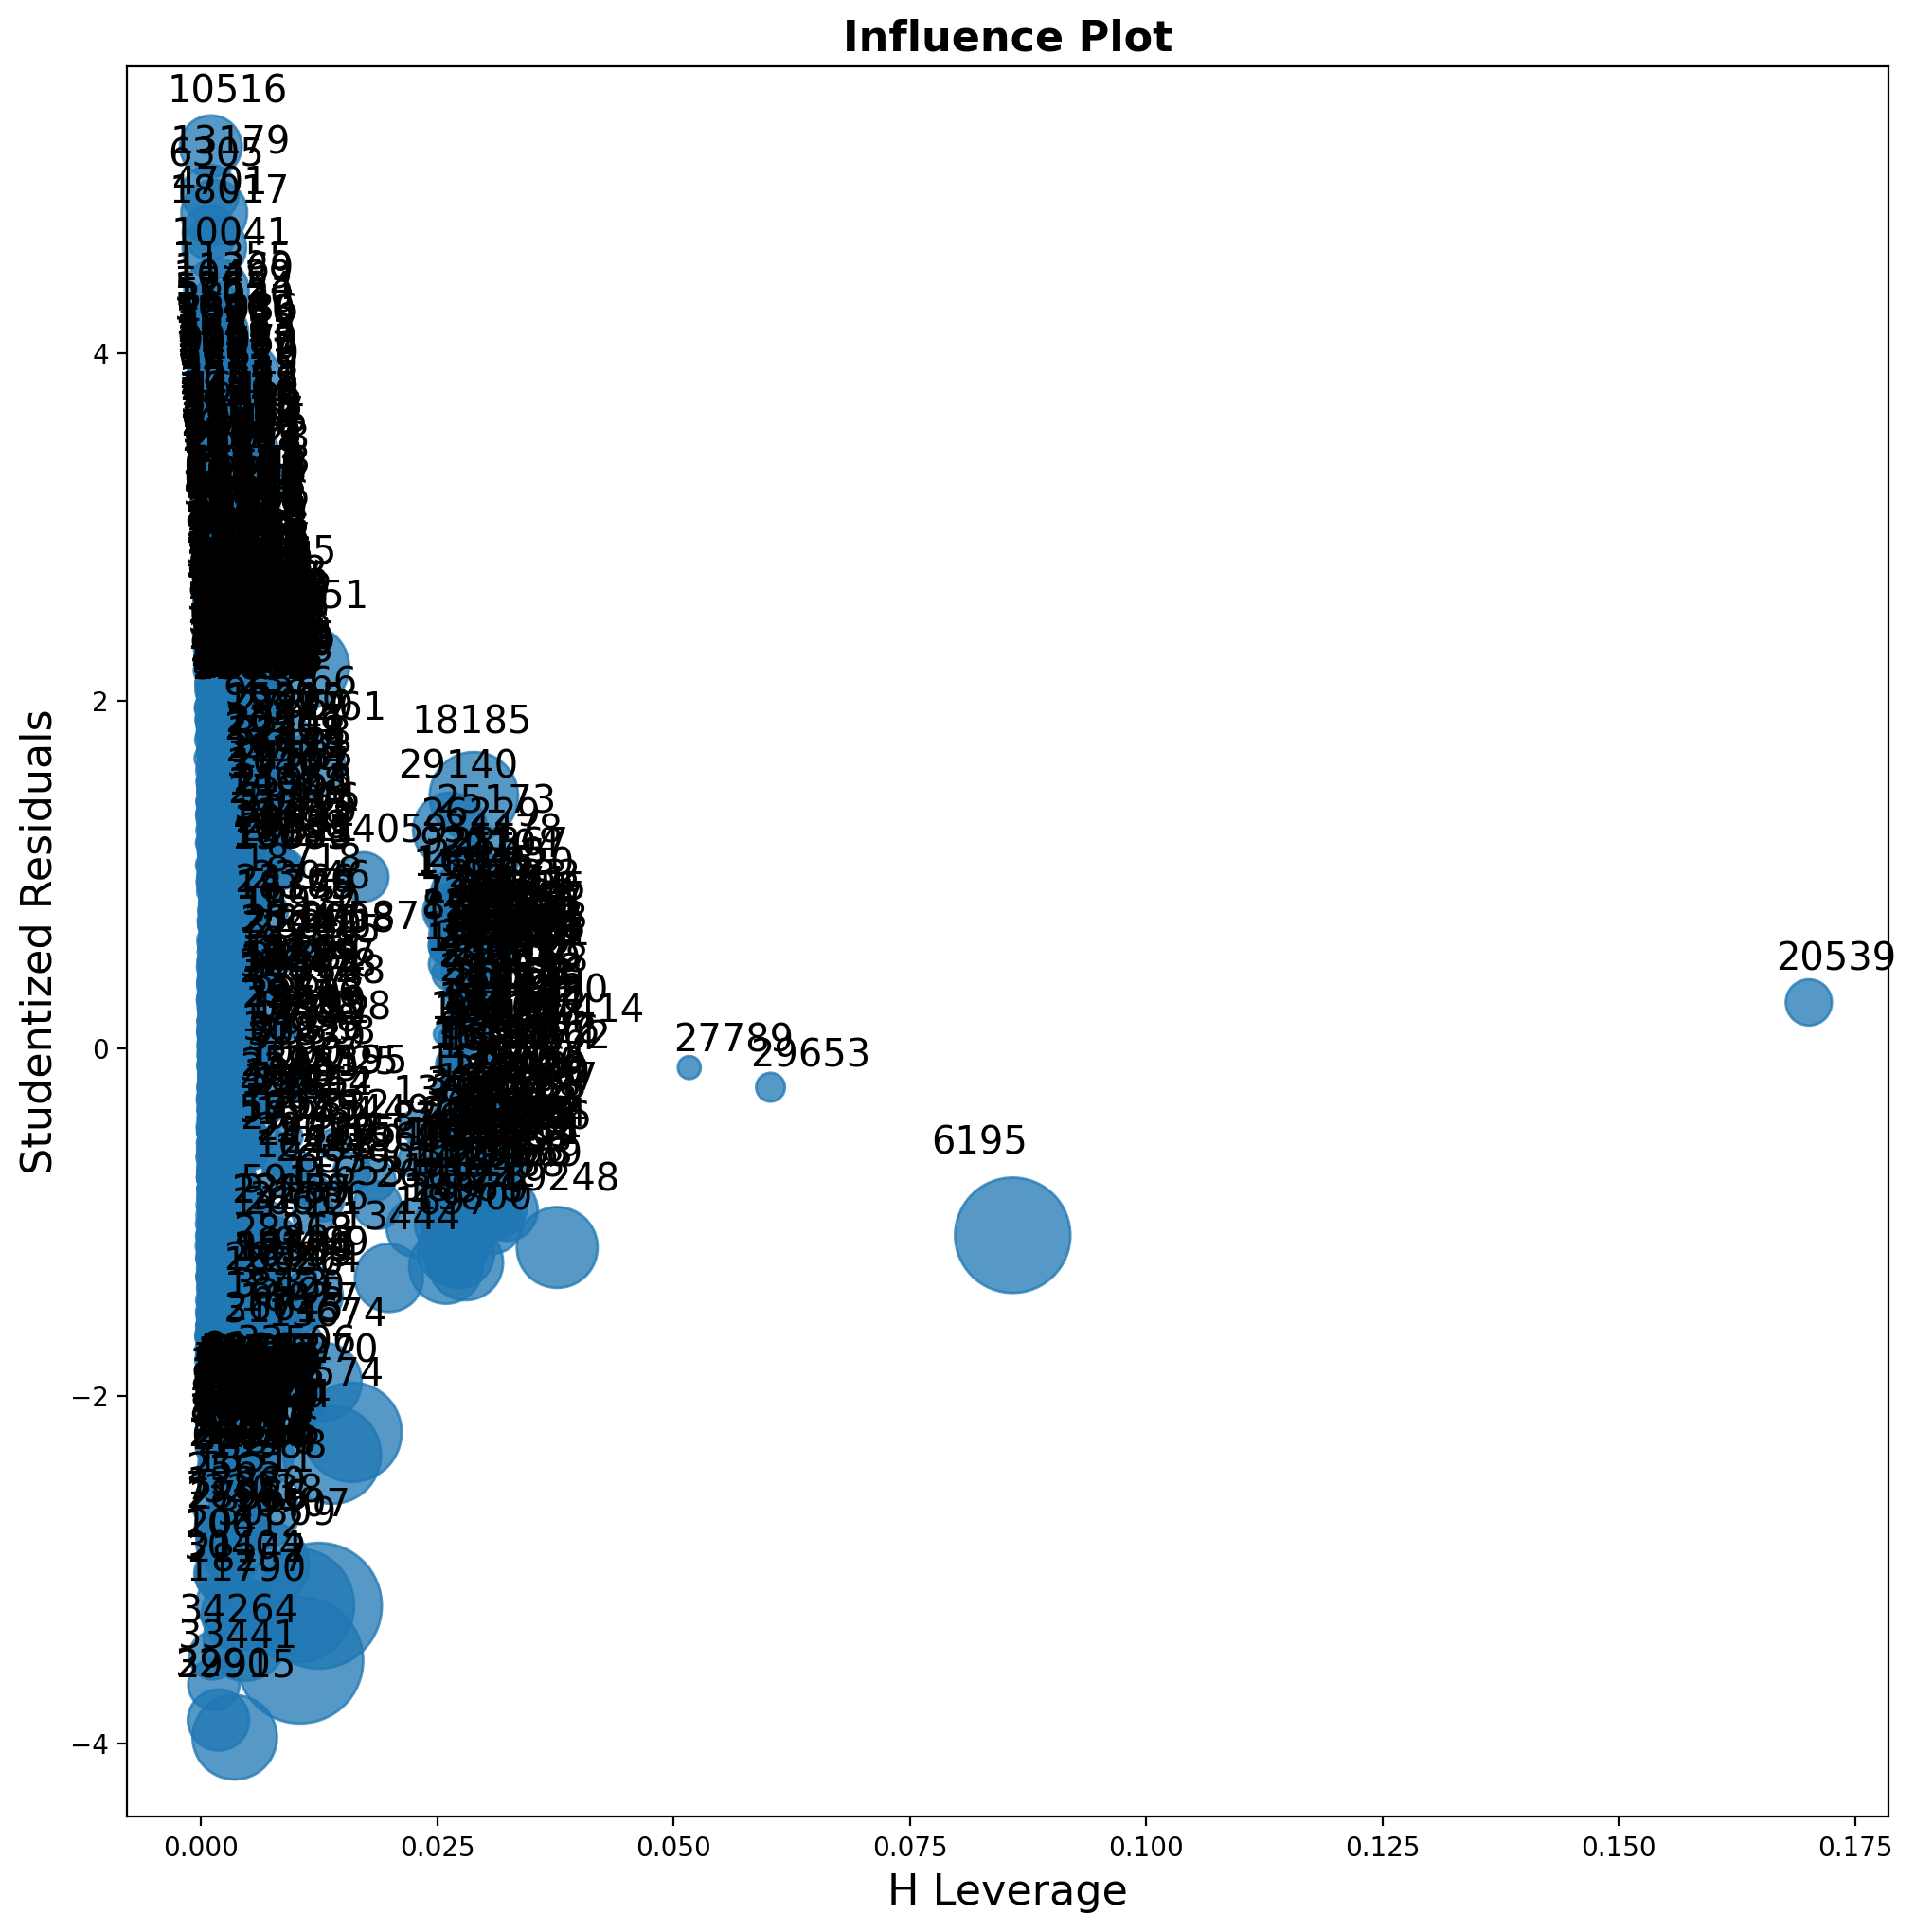

In [ ]:
#this plot below is with influential points removed based on cooks_distance and the 4/n threshold

#graphical representation of the influences()
#size of points are given by cook's dist value

fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 

# took ~6 minutes to run when we have tens of predictors vs hundreds of predictors
# if it took longer to run, can take a nongraphical approach with
# cooks distance above since influence plot took forever and 
# code never finished computing

#comment: looking at the scale of the x and y axis, after remove influential points,
#the number of influential points has improved




(array([  10.,   59.,  669., 2659., 3244., 1252.,  415.,  137.,   46.,
           6.]),
 array([-1057745.94535162,  -813461.18681851,  -569176.42828541,
         -324891.6697523 ,   -80606.91121919,   163677.84731391,
          407962.60584702,   652247.36438013,   896532.12291323,
         1140816.88144634,  1385101.63997944]),
 <BarContainer object of 10 artists>)

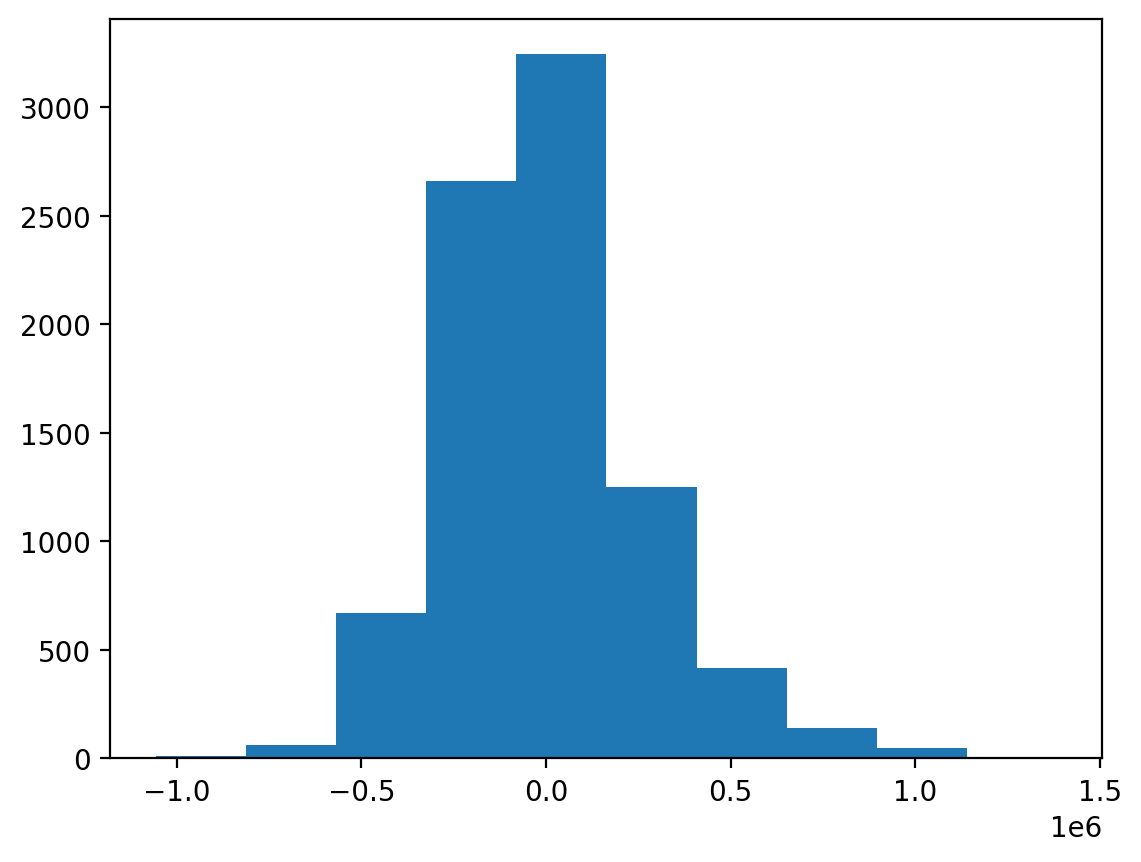

In [ ]:
#checking normality of residuals
#histogram of residual to observe the shape/skewness
# comments: unimodal, approx symmetric, 
plt.hist(model.resid)

In [ ]:
#checking normality of residuals

#from summary table
#check normality: Omnibus test combines skewness and kurtosis. 
# Omnibus p value <0.05. Conclude H1: residuals are significantly non-normal.
# Violates non-normal assumption
# Kurtosis is relatively high.

# JB p value <0.05.  Conclude: H1: residuals are significantly non-normal.
#Note JB test is very sensitive to outliers

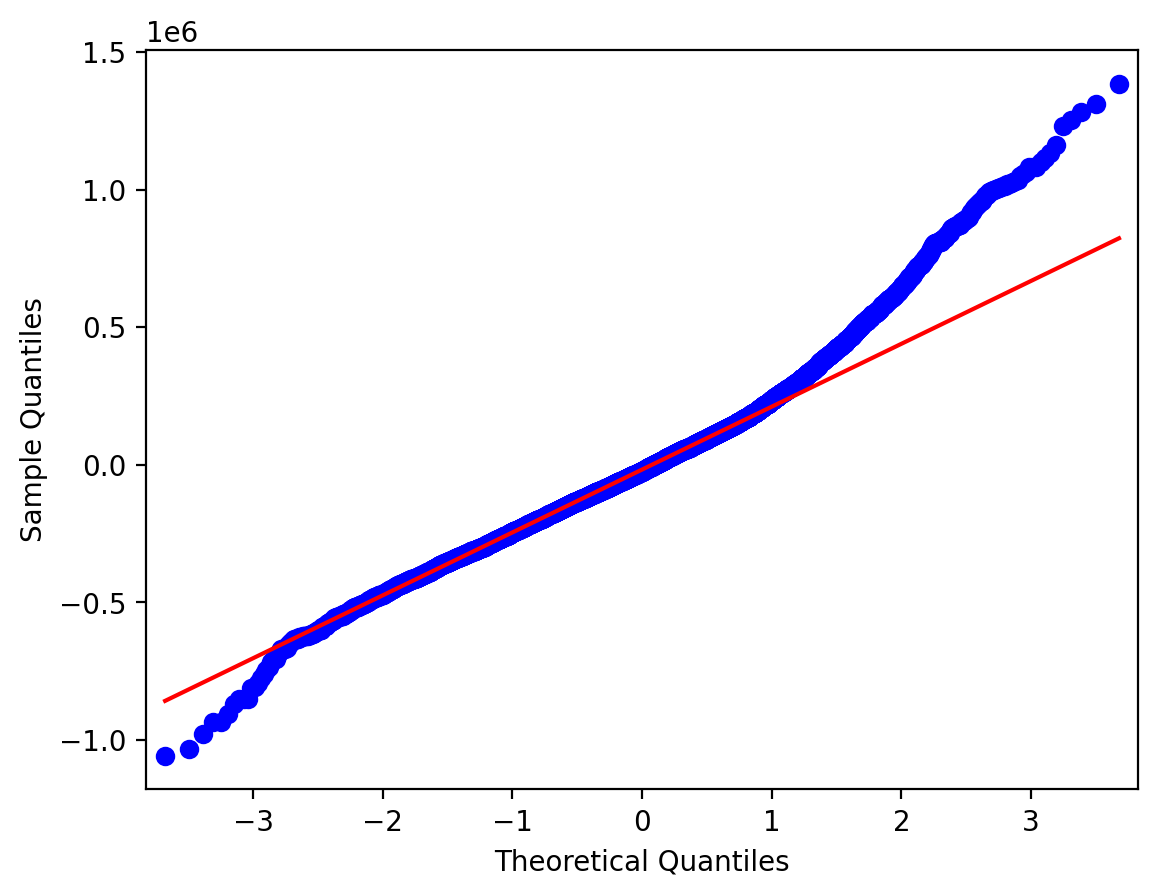

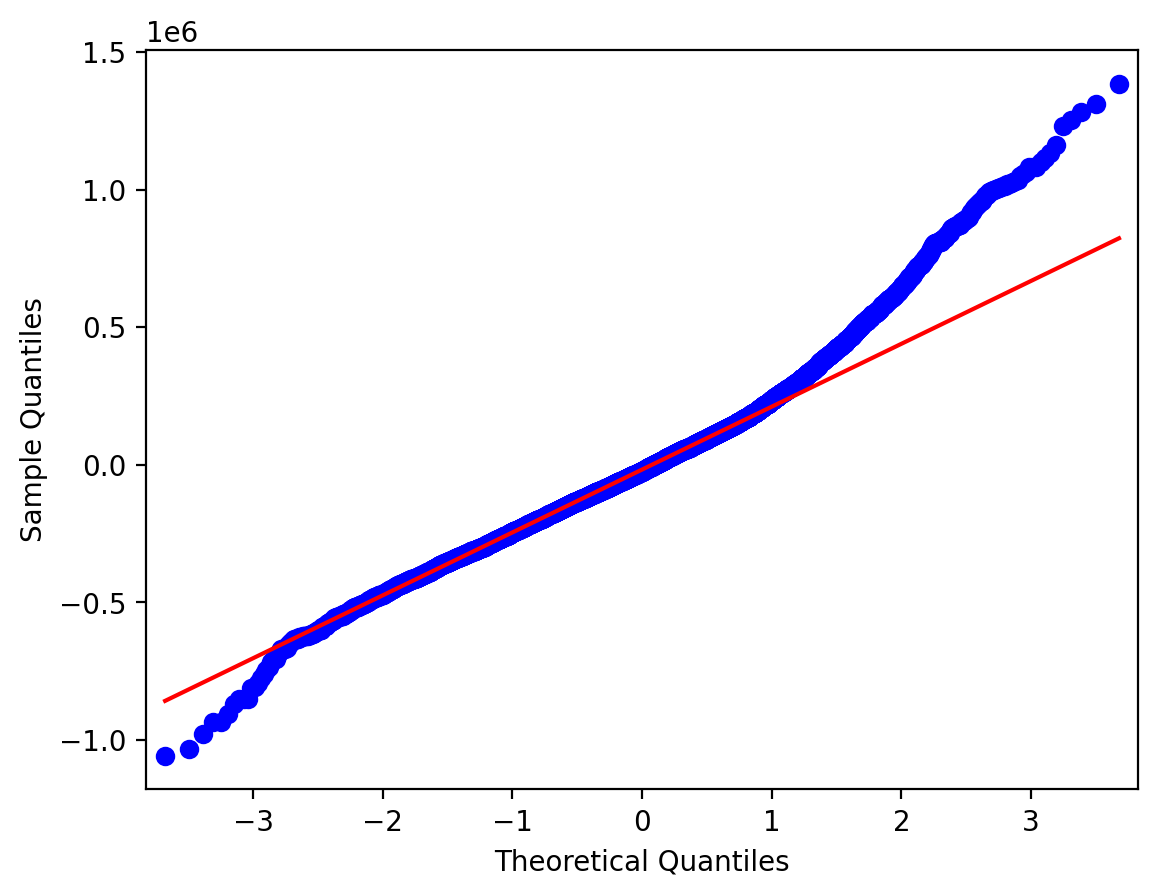

In [ ]:
#checking normality of residuals

sm.qqplot(model.resid, line="q")
# QQ plot to check for normality. Curve away in opposite directions
# at both ends from straight line suggests heavy tail/kurtosis.

# omnibus test, JB test, QQplot all agree and suggest normal assumption is violated.
#However, our sample size is 8501 even with the initial model with influential points removed.
# so CLT guarantees that residuals is approximately normally distributed.

In [ ]:
#checking Heteroscedasticity

#Breusch-Pagan is for "systematic" Heteroscedasticity. A random pattern coudl pass BP test
#so also need to do residual plot.
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

#.pvalue=6.3e-212, so p value<<0.05 so
# there is significant Heteroscedasticity

{'LM Statistic': 1072.0264814444088, 'LM-Test p-value': 6.335775285539731e-212}


Text(0.5, 1.0, 'Fitted Values vs. Residuals')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


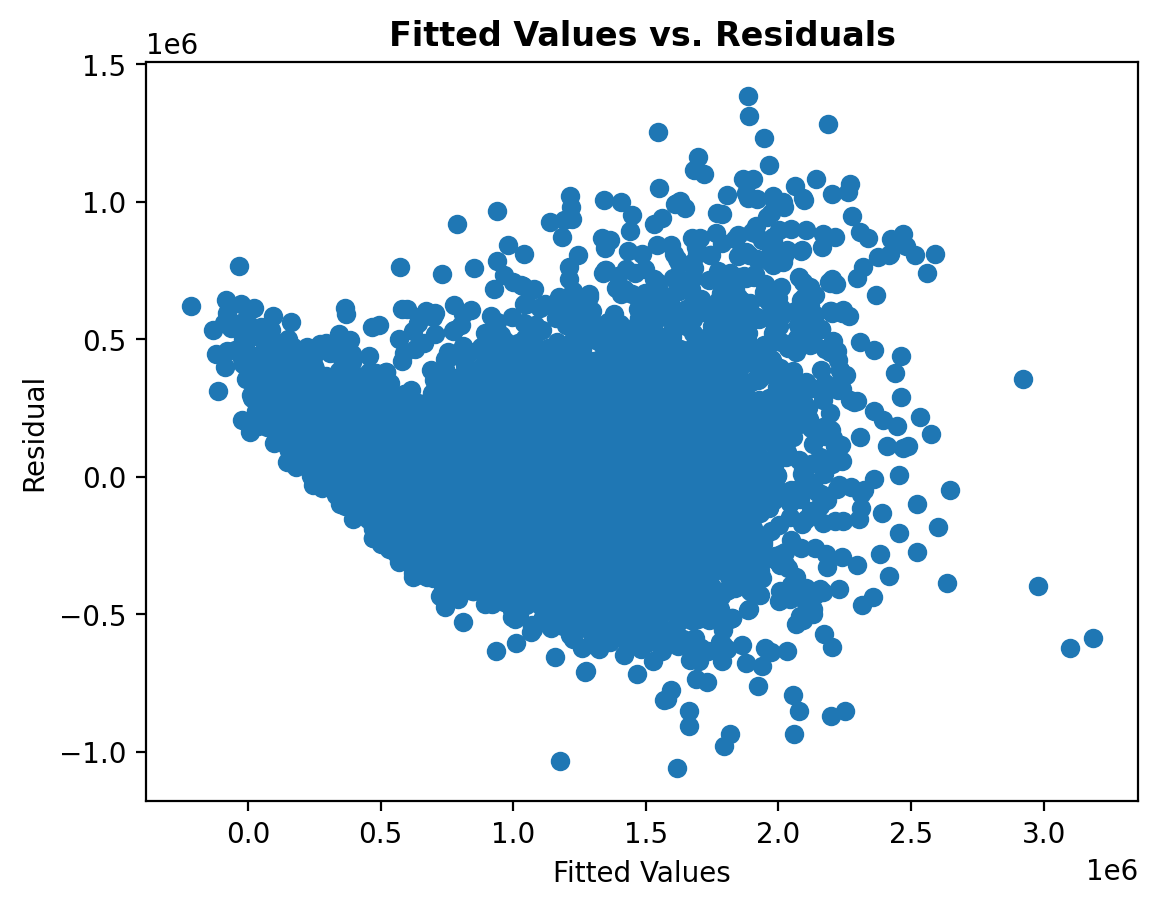

In [ ]:
#checking Heteroscedasticity
#Fitted Values vs. Residuals Plot
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")
# residual plot agrees with BP that there is heteroscedasticity.
# There is a funnel shape(cluster in beginning and spread out at end) where the band is smaller for smaller fitted values
#and band is larger for larger fitted values.

In [ ]:
columns_subset=['Price','Type',
 'Method',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [ ]:
df_without_infl_pt= df_without_infl_pt[columns_subset]

log_price=np.log(df_without_infl_pt['Price'])
df_without_infl_pt['log_price']=log_price
df_without_infl_pt
df=df_without_infl_pt
df


/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Price Type Method  Distance  Bedroom2  Bathroom  Car  Landsize  \
2      1035000.0    h      S       2.5       2.0       1.0  0.0     156.0   
4      1465000.0    h     SP       2.5       3.0       2.0  0.0     134.0   
6      1600000.0    h     VB       2.5       3.0       1.0  2.0     120.0   
11     1876000.0    h      S       2.5       4.0       2.0  0.0     245.0   
14     1636000.0    h      S       2.5       2.0       1.0  2.0     256.0   
...          ...  ...    ...       ...       ...       ...  ...       ...   
34847   500000.0    h     PI      25.5       3.0       2.0  2.0     383.0   
34849   570000.0    h     SP      25.5       3.0       2.0  2.0     404.0   
34853   888000.0    h     SP       6.3       2.0       2.0  1.0      98.0   
34854   705000.0    t      S       6.3       2.0       1.0  2.0     220.0   
34856  1020000.0    h     PI       6.3       2.0       1.0  0.0     250.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
2              79.0     1900.0  -37.80790   144.99340  Northern Metropolitan   
4             150.0     1900.0  -37.80930   144.99440  Northern Metropolitan   
6             142.0     2014.0  -37.80720   144.99410  Northern Metropolitan   
11            210.0     1910.0  -37.80240   144.99930  Northern Metropolitan   
14            107.0     1890.0  -37.80600   144.99540  Northern Metropolitan   
...             ...        ...        ...         ...                    ...   
34847         118.0     2016.0  -37.61940   145.03951  Northern Metropolitan   
34849         158.0     2012.0  -37.61031   145.03393  Northern Metropolitan   
34853         104.0     2018.0  -37.81551   144.88826   Western Metropolitan   
34854         120.0     2000.0  -37.82286   144.87856   Western Metropolitan   
34856         103.0     1930.0  -37.81810   144.89351   Western Metropolitan   

       Propertycount  log_price  
2             4019.0  13.849912  
4             4019.0  14.197366  
6             4019.0  14.285514  
11            4019.0  14.444652  
14            4019.0  14.307765  
...              ...        ...  
34847         2940.0  13.122363  
34849         2940.0  13.253392  
34853         6543.0  13.696727  
34854         6543.0  13.465953  
34856         6543.0  13.835313  

[8497 rows x 15 columns]

In [ ]:
full_model='log_price~C(Type)+C(Method)+ Distance + Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+Longtitude+ C(Regionname)+ Propertycount'
model =smf.ols(full_model,data=df).fit()
#model.summary()


In [ ]:
#checking Heteroscedasticity

#Breusch-Pagan is for "systematic" Heteroscedasticity. A random pattern coudl pass BP test
#so also need to do residual plot.
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

# original BP pvalue=6.2e-220 before log transform on y
#after log transform on y, p value= 1.99e-35 so the degree of 'systematic' heteroscedasticity 
#seems to be reduced


{'LM Statistic': 226.75449233325986, 'LM-Test p-value': 1.993740145038106e-35}


Text(0.5, 1.0, 'Fitted Values vs. Residuals')

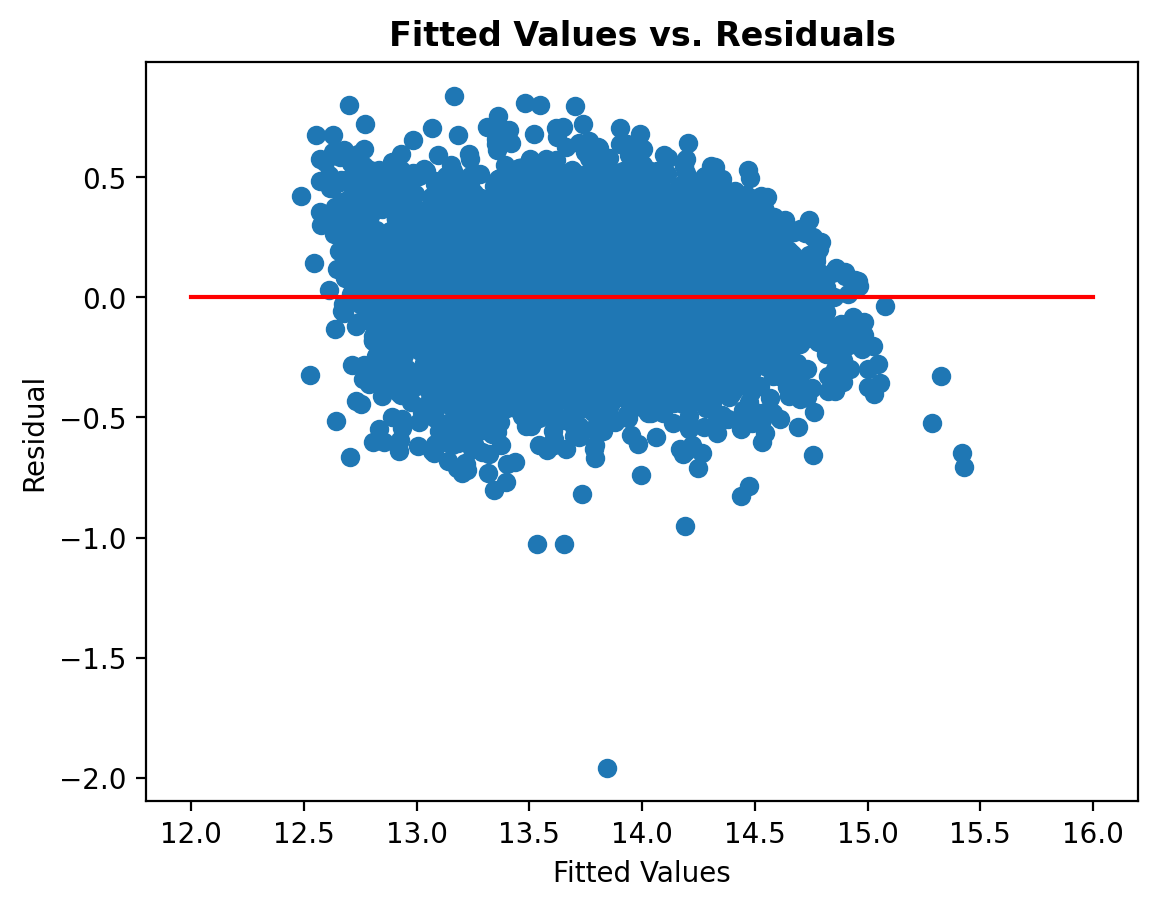

In [ ]:
#checking Heteroscedasticity and nonlinearity
#Fitted Values vs. Residuals Plot
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.plot([12,16],[0,0],'r')
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

#comment: the band width looks much more constant across the fitted values after log transform on y.
#From the residual plot, we can also comment on the linearity. The values look
#approximately evenly distributed about the 0 line.

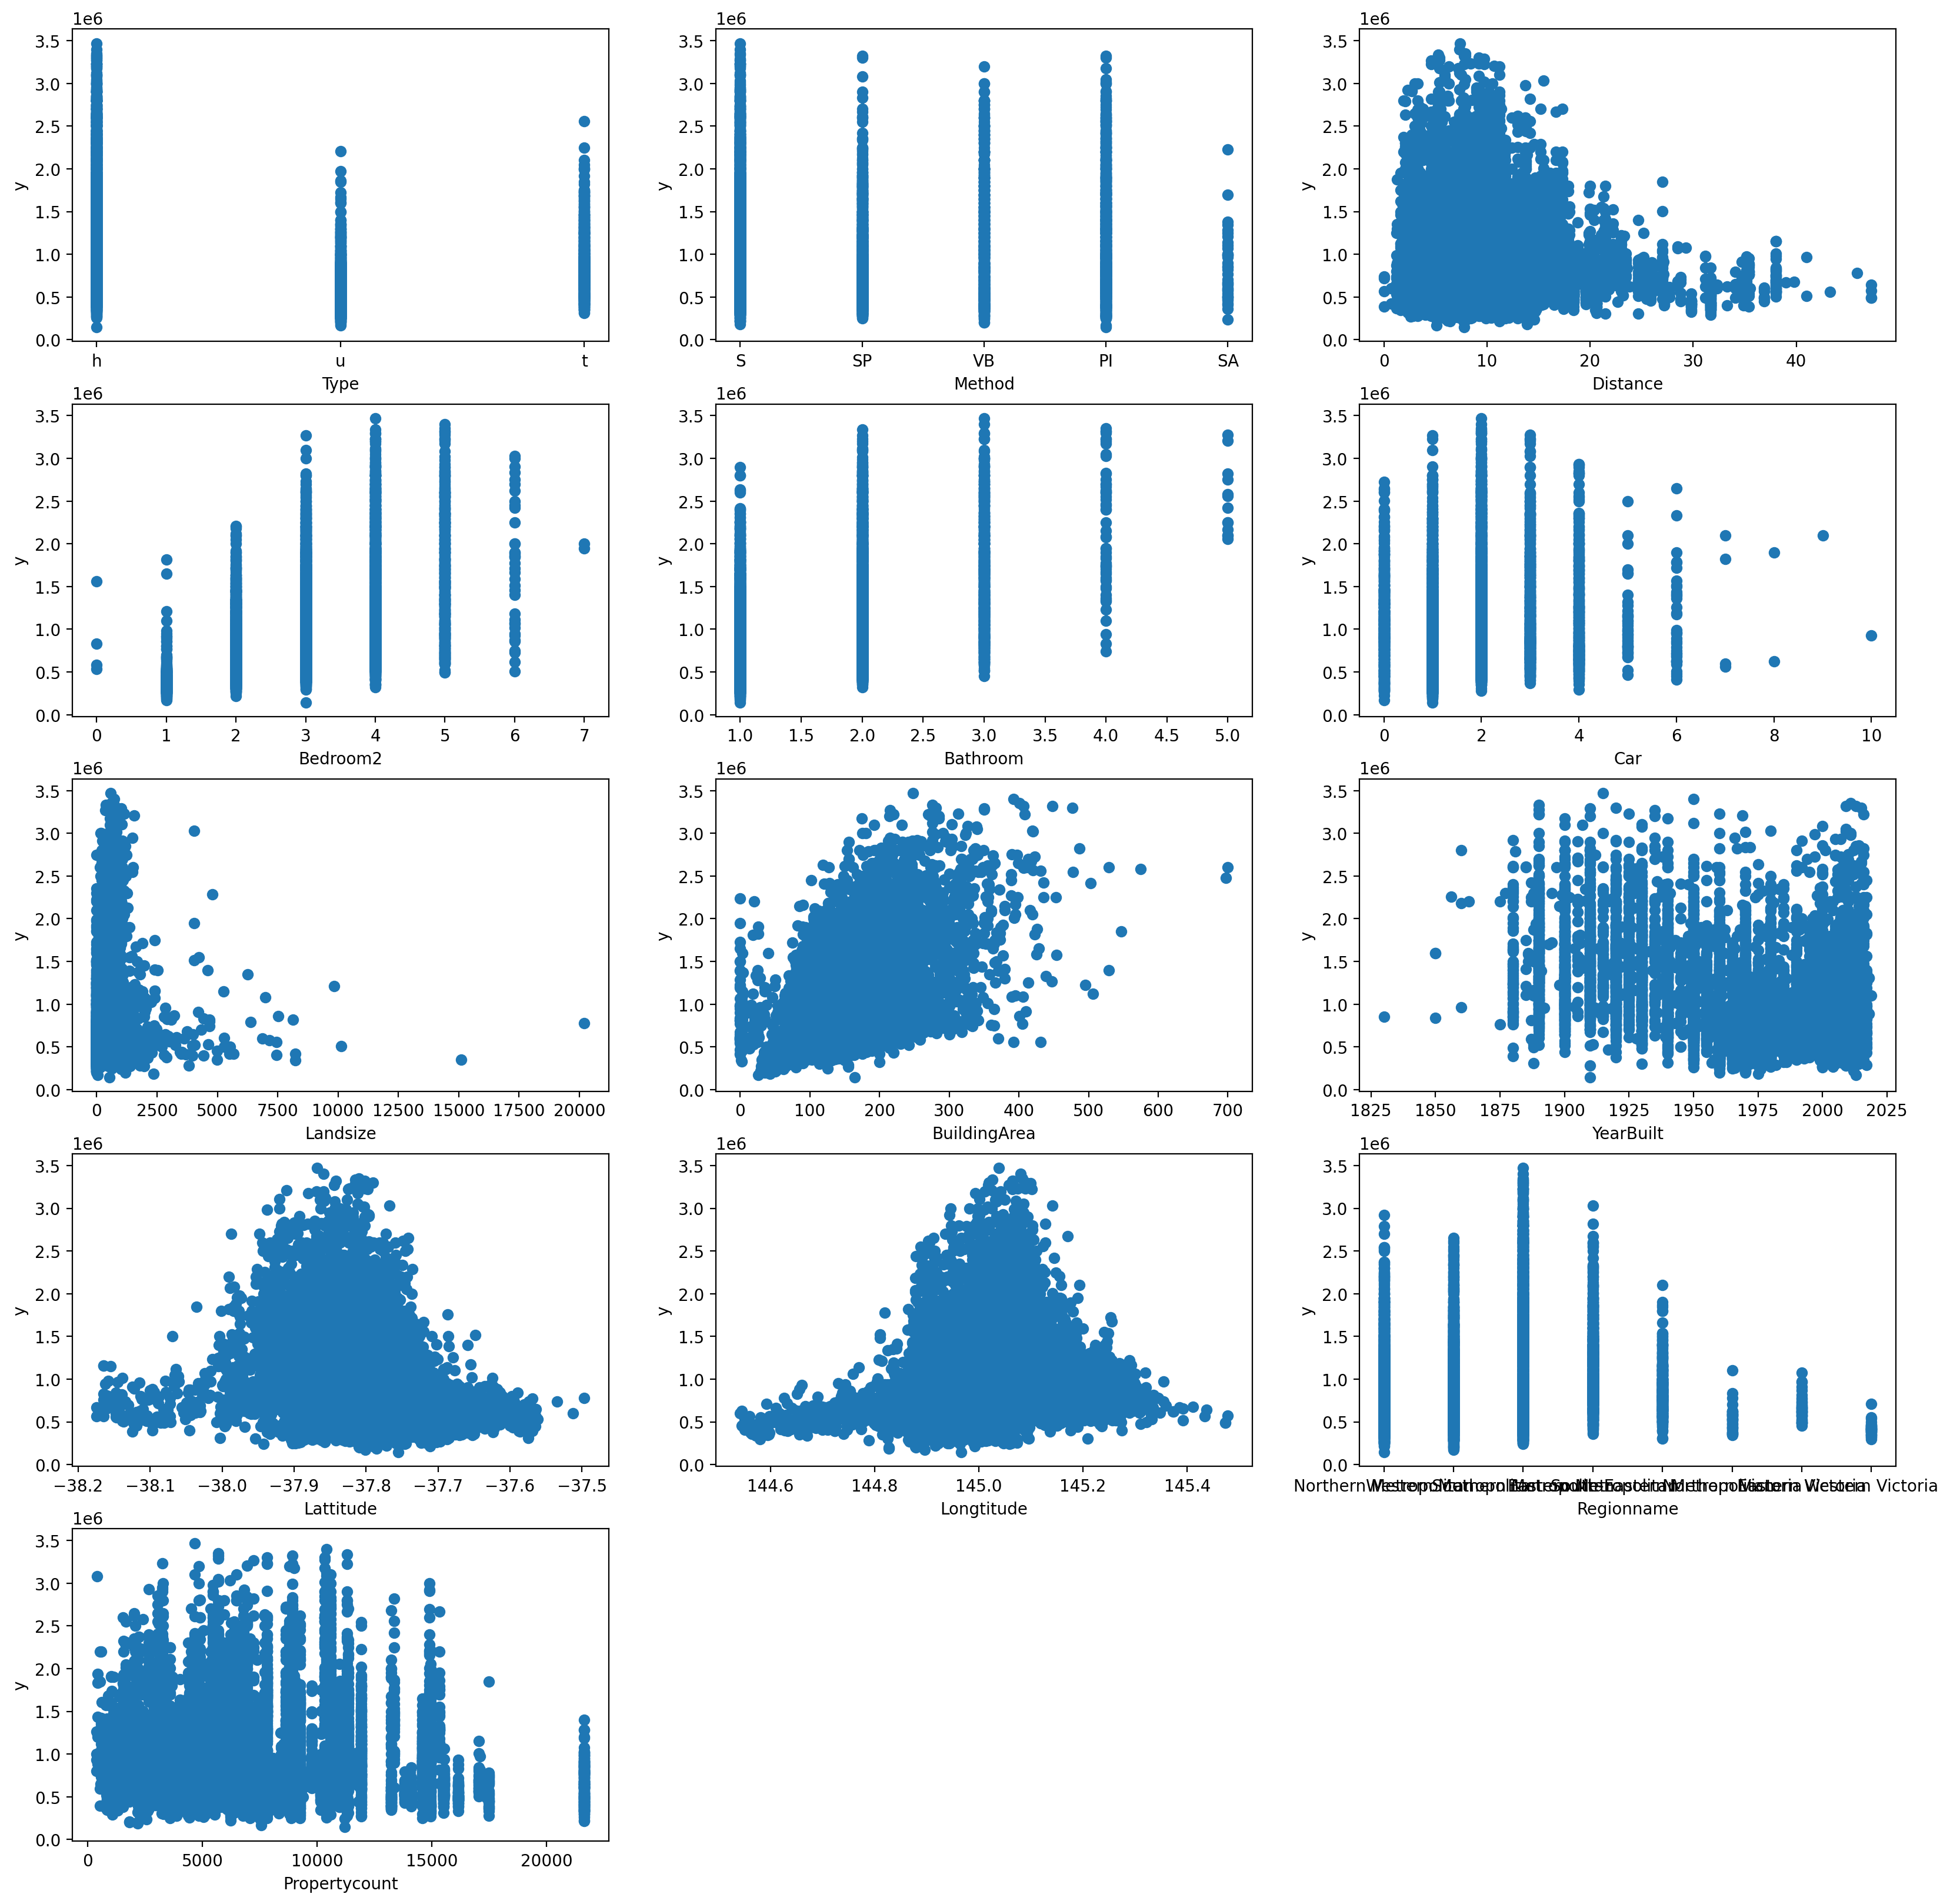

In [ ]:
#checking nonlinearity
#without influential points, before transform

#in the pdf, the sns.pairplot may be too small to read. so use professor's method for generating
#grid of plots

#before log transform of y
predictor=df[['Type', 'Method', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']]
plt.figure(figsize=(20,20)) 
for i, col in enumerate(predictor.columns):
    plt.subplot(5, 3, i+1)
    x = predictor[col]
    y = df.Price
    plt.plot(x, y, 'o' )
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('y')

#check linearity assumption based on y vs predictor scatterplot.  
#comments: all plots look nonlinear.



/opt/venv/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/venv/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/venv/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


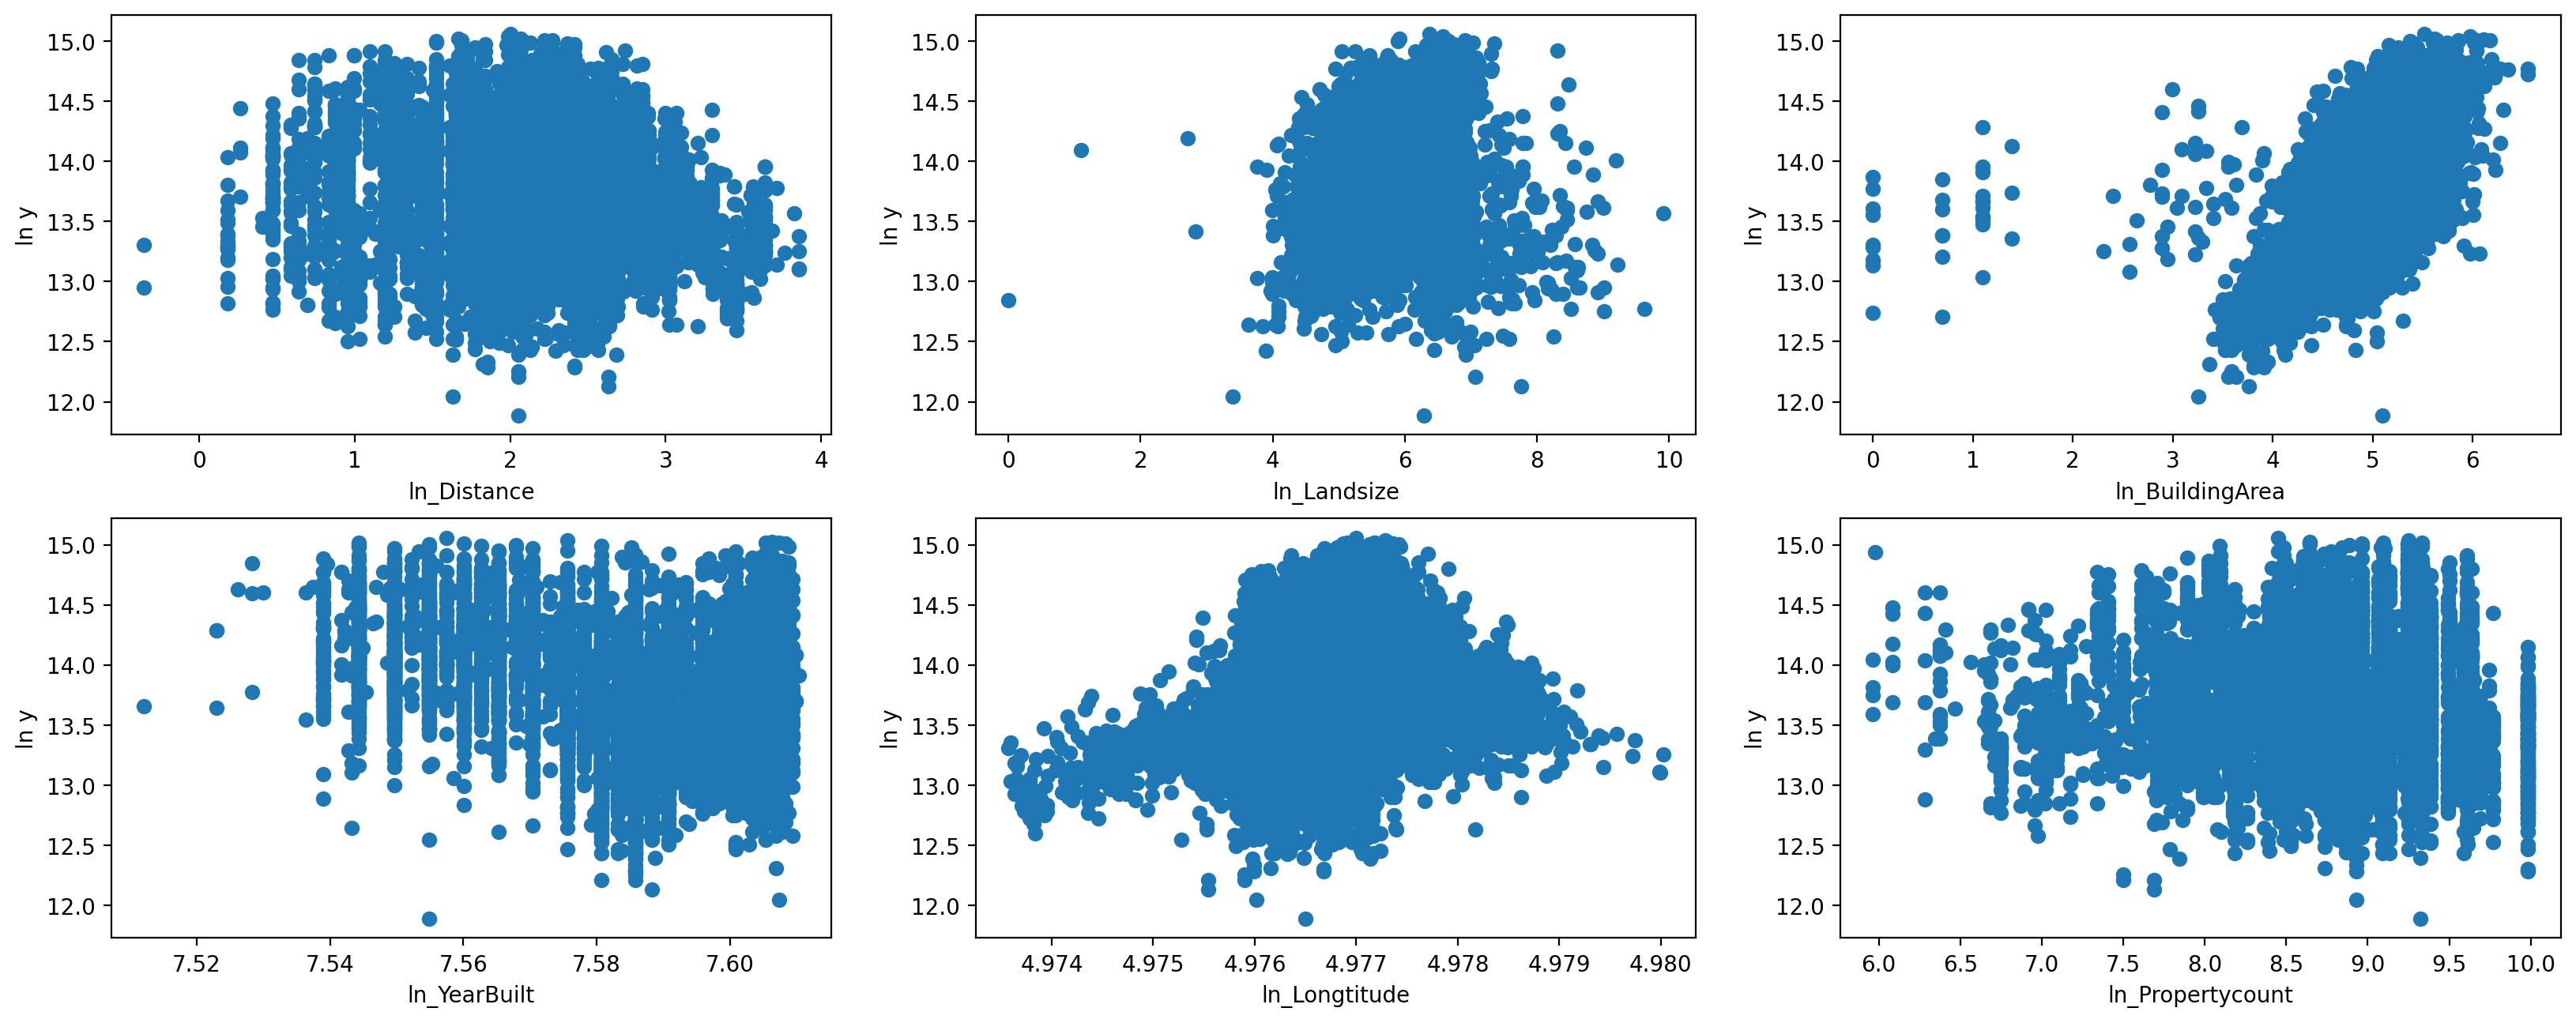

In [ ]:
#checking nonlinearity

# log transform of y 
#only log transform the quantitative predictors . 'Lattitude' has negative number so can't log 
#transform it.
#log transform YearBuilt didn't seem to help so keep original YearBuilt without log transform for new model.

predictor=df[['Distance', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Longtitude', 'Propertycount']]
plt.figure(figsize=(20,20)) 
for i, col in enumerate(predictor.columns):
    plt.subplot(5, 3, i+1)
    x = predictor[col]
    #print(type(x.iloc[0]))
    #if type(x.iloc[0])!='str':
    x=np.log(x)
    df['log_'+col]=x
    y = df.log_price
    plt.plot(x, y, 'o' )
    #plt.title(col)
    plt.xlabel('ln_'+col)
    plt.ylabel('ln y')


#after log log transformation, linearity assumption is better.
# if make predictions/final model don't forget to write the transformation done.

In [ ]:
df.shape

(8497, 21)

In [ ]:
df = df.dropna()
df.shape

(8497, 21)

In [ ]:
#fit initial model 2_0 with influential points and after transformation

# R-squared=0.646 with influential points. R-squared from above. for model1_0
# R-squared =0.756 without influential points. for  model1_1
#Getting rid of influential points leads to better fit.

#previous model without log transform
# full_model='''Price~Type+Method+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ 
# BuildingArea+ YearBuilt+ Lattitude+Longtitude+ Regionname+ Propertycount'''

#Note:
#log_Landsize+ log_BuildingArea causing LinAlgError: SVD did not converge 
#because (df.log_Landsize==-np.inf).sum() shows there are negative infinity values.
# same for log_BuildingArea
# therefore, keep Landsize adn BuildingArea without transformation in initial model 2
#log_Distance also has several -np.inf and results in nan in model.summary() so keep it untransformed.

# model2_0 with influential points
full_model='''log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ 
BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)+ log_Propertycount'''


model =smf.ols(full_model,data=df).fit()
model.summary()

# R-squared =0.797 for  model2_0. suggests slightly better fit compared to model1_0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1447.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:23:04   Log-Likelihood:                 621.15
No. Observations:                8497   AIC:                            -1194.
Df Residuals:                    8473   BIC:                            -1025.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    -646.8020     30.103    -21.486      0.000    -705.812    -587.792
C(Type)[T.t]                                   -0.1130      0.010    -11.036      0.000      -0.133      -0.093
C(Type)[T.u]                                   -0.4425      0.009    -49.419      0.000      -0.460      -0.425
C(Method)[T.S]                                  0.0858      0.008     11.086      0.000       0.071       0.101
C(Method)[T.SA]                                 0.0393      0.036      1.080      0.280      -0.032       0.111
C(Method)[T.SP]                                 0.0460      0.010      4.771      0.000       0.027       0.065
C(Method)[T.VB]                                 0.0085      0.011      0.791      0.429      -0.013       0.029
C(Regionname)[T.Eastern Victoria]              -0.0878      0.040     -2.221      0.026      -0.165      -0.010
C(Regionname)[T.Northern Metropolitan]         -0.0698      0.012     -5.902      0.000      -0.093      -0.047
C(Regionname)[T.Northern Victoria]              0.2571      0.041      6.248      0.000       0.176       0.338
C(Regionname)[T.South-Eastern Metropolitan]    -0.0266      0.018     -1.453      0.146      -0.062       0.009
C(Regionname)[T.Southern Metropolitan]          0.1291      0.011     12.255      0.000       0.108       0.150
C(Regionname)[T.Western Metropolitan]          -0.0506      0.015     -3.337      0.001      -0.080      -0.021
C(Regionname)[T.Western Victoria]               0.2574      0.047      5.474      0.000       0.165       0.350
Distance                                       -0.0350      0.001    -60.417      0.000      -0.036      -0.034
Bedroom2                                        0.0982      0.004     22.245      0.000       0.090       0.107
Bathroom                                        0.0726      0.005     13.787      0.000       0.062       0.083
Car                                             0.0300      0.003     10.116      0.000       0.024       0.036
Landsize                                      2.73e-05   4.44e-06      6.146      0.000    1.86e-05     3.6e-05
BuildingArea                                    0.0021   5.75e-05     35.920      0.000       0.002       0.002
YearBuilt                                      -0.0025   9.03e-05    -27.977      0.000      -0.003      -0.002
Lattitude                                      -0.8380      0.046    -18.340      0.000      -0.928      -0.748
log_Longtitude                                127.2816      6.034     21.094      0.000     115.453     139.110
log_Propertycount                               0.0010      0.004      0.264      0.792      -0.007       0.009
===========================================================

In [ ]:
#for initial model 2_1, below cells will be checking the following:
#check multicollin
# check infl pt
#check normality
# check heterosced
#check linearity


In [ ]:
#Model evaluation/diagnostics


y, X = dmatrices(full_model, data=df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
vif["features"] = X.columns
vif


# VIF for all predictors <10. No high multicollinearity

VIF Factor                                     features
0   1.517882e+08                                    Intercept
1   1.340000e+00                                 C(Type)[T.t]
2   1.970000e+00                                 C(Type)[T.u]
3   2.320000e+00                               C(Method)[T.S]
4   1.040000e+00                              C(Method)[T.SA]
5   1.950000e+00                              C(Method)[T.SP]
6   1.610000e+00                              C(Method)[T.VB]
7   1.230000e+00            C(Regionname)[T.Eastern Victoria]
8   4.940000e+00       C(Regionname)[T.Northern Metropolitan]
9   1.230000e+00           C(Regionname)[T.Northern Victoria]
10  2.220000e+00  C(Regionname)[T.South-Eastern Metropolitan]
11  3.870000e+00       C(Regionname)[T.Southern Metropolitan]
12  6.970000e+00        C(Regionname)[T.Western Metropolitan]
13  1.480000e+00            C(Regionname)[T.Western Victoria]
14  2.390000e+00                                     Distance
15  2.840000e+00                                     Bedroom2
16  2.110000e+00                                     Bathroom
17  1.290000e+00                                          Car
18  1.090000e+00                                     Landsize
19  2.570000e+00                                 BuildingArea
20  1.760000e+00                                    YearBuilt
21  2.750000e+00                                    Lattitude
22  3.980000e+00                               log_Longtitude
23  1.100000e+00                            log_Propertycount

In [ ]:
# determining influential points
n=df.shape[0]
cook_threshold=4/n
cook_threshold,n

(0.0004707543839002001, 8497)

In [ ]:
# Influential points
#object for the analysis of influential points
infl = model.get_influence()


In [ ]:
infl_pt=infl.cooks_distance[0] >= cook_threshold
infl_pt_idx=df.index[infl_pt]
len(infl_pt_idx),infl_pt_idx

(451,
 Int64Index([    6,    73,    81,    90,   106,   230,   242,   255,   262,
               278,
             ...
             34212, 34261, 34264, 34585, 34746, 34750, 34752, 34787, 34807,
             34823],
            dtype='int64', length=451))

In [ ]:
n-len(infl_pt_idx) #num of data points without influential points

8046

In [ ]:
bad_df=df.index.isin(infl_pt_idx)
df_without_infl_pt=df[~bad_df]#.shape
df_without_infl_pt.shape


(8046, 21)

In [ ]:
infl_data = infl_data.append(df.loc[bad_df])

In [ ]:
# model2_1 without influential points
full_model='''log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ 
BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'''


model =smf.ols(full_model,data=df_without_infl_pt).fit()
model.summary()

# R-squared =0.797 for  model2_0.
# R-squared =0.838 for  model2_1. suggests model2_1 is better fit than previous models.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1808.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:23:05   Log-Likelihood:                 1667.0
No. Observations:                8046   AIC:                            -3286.
Df Residuals:                    8022   BIC:                            -3118.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    -756.8750     28.668    -26.401      0.000    -813.072    -700.678
C(Type)[T.t]                                   -0.1238      0.009    -13.348      0.000      -0.142      -0.106
C(Type)[T.u]                                   -0.4533      0.008    -55.506      0.000      -0.469      -0.437
C(Method)[T.S]                                  0.0803      0.007     11.471      0.000       0.067       0.094
C(Method)[T.SA]                                 0.0340      0.046      0.743      0.458      -0.056       0.124
C(Method)[T.SP]                                 0.0415      0.009      4.753      0.000       0.024       0.059
C(Method)[T.VB]                                -0.0083      0.010     -0.855      0.393      -0.027       0.011
C(Regionname)[T.Eastern Victoria]              -0.0859      0.039     -2.189      0.029      -0.163      -0.009
C(Regionname)[T.Northern Metropolitan]         -0.0560      0.011     -5.158      0.000      -0.077      -0.035
C(Regionname)[T.Northern Victoria]              0.3565      0.056      6.315      0.000       0.246       0.467
C(Regionname)[T.South-Eastern Metropolitan]    -0.0542      0.017     -3.215      0.001      -0.087      -0.021
C(Regionname)[T.Southern Metropolitan]          0.1224      0.010     12.817      0.000       0.104       0.141
C(Regionname)[T.Western Metropolitan]          -0.0321      0.014     -2.288      0.022      -0.060      -0.005
C(Regionname)[T.Western Victoria]               0.3696      0.051      7.232      0.000       0.269       0.470
Distance                                       -0.0376      0.001    -68.583      0.000      -0.039      -0.036
Bedroom2                                        0.0862      0.004     20.965      0.000       0.078       0.094
Bathroom                                        0.0600      0.005     12.487      0.000       0.051       0.069
Car                                             0.0269      0.003      9.913      0.000       0.022       0.032
Landsize                                     4.109e-05   5.67e-06      7.242      0.000       3e-05    5.22e-05
BuildingArea                                    0.0024   5.65e-05     42.143      0.000       0.002       0.002
YearBuilt                                      -0.0025   8.22e-05    -29.879      0.000      -0.003      -0.002
Lattitude                                      -0.9379      0.043    -22.033      0.000      -1.021      -0.854
log_Longtitude                                148.6262      5.737     25.905      0.000     137.379     159.873
log_Propertycount                              -0.0021      0.004     -0.597      0.551      -0.009       0.005
===========================================================

In [ ]:
# model2_1 without influential points
full_model='''log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ 
BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)+ log_Propertycount'''


model =smf.ols(full_model,data=df_without_infl_pt).fit()
model.summary()
# R-squared =0.646 for model1_0 with infl pt and before transform
# R-squared =0.797 for  model2_0.
# R-squared =0.838 for  model2_1 without infl pt and after transform.
#suggests model2_1 is better fit than previous models.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1808.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:23:06   Log-Likelihood:                 1667.0
No. Observations:                8046   AIC:                            -3286.
Df Residuals:                    8022   BIC:                            -3118.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    -756.8750     28.668    -26.401      0.000    -813.072    -700.678
C(Type)[T.t]                                   -0.1238      0.009    -13.348      0.000      -0.142      -0.106
C(Type)[T.u]                                   -0.4533      0.008    -55.506      0.000      -0.469      -0.437
C(Method)[T.S]                                  0.0803      0.007     11.471      0.000       0.067       0.094
C(Method)[T.SA]                                 0.0340      0.046      0.743      0.458      -0.056       0.124
C(Method)[T.SP]                                 0.0415      0.009      4.753      0.000       0.024       0.059
C(Method)[T.VB]                                -0.0083      0.010     -0.855      0.393      -0.027       0.011
C(Regionname)[T.Eastern Victoria]              -0.0859      0.039     -2.189      0.029      -0.163      -0.009
C(Regionname)[T.Northern Metropolitan]         -0.0560      0.011     -5.158      0.000      -0.077      -0.035
C(Regionname)[T.Northern Victoria]              0.3565      0.056      6.315      0.000       0.246       0.467
C(Regionname)[T.South-Eastern Metropolitan]    -0.0542      0.017     -3.215      0.001      -0.087      -0.021
C(Regionname)[T.Southern Metropolitan]          0.1224      0.010     12.817      0.000       0.104       0.141
C(Regionname)[T.Western Metropolitan]          -0.0321      0.014     -2.288      0.022      -0.060      -0.005
C(Regionname)[T.Western Victoria]               0.3696      0.051      7.232      0.000       0.269       0.470
Distance                                       -0.0376      0.001    -68.583      0.000      -0.039      -0.036
Bedroom2                                        0.0862      0.004     20.965      0.000       0.078       0.094
Bathroom                                        0.0600      0.005     12.487      0.000       0.051       0.069
Car                                             0.0269      0.003      9.913      0.000       0.022       0.032
Landsize                                     4.109e-05   5.67e-06      7.242      0.000       3e-05    5.22e-05
BuildingArea                                    0.0024   5.65e-05     42.143      0.000       0.002       0.002
YearBuilt                                      -0.0025   8.22e-05    -29.879      0.000      -0.003      -0.002
Lattitude                                      -0.9379      0.043    -22.033      0.000      -1.021      -0.854
log_Longtitude                                148.6262      5.737     25.905      0.000     137.379     159.873
log_Propertycount                              -0.0021      0.004     -0.597      0.551      -0.009       0.005
===========================================================

(array([  18.,  218.,  679., 1384., 1987., 1881., 1178.,  527.,  161.,
          13.]),
 array([-0.6280002 , -0.49948908, -0.37097795, -0.24246682, -0.11395569,
         0.01455544,  0.14306656,  0.27157769,  0.40008882,  0.52859995,
         0.65711108]),
 <BarContainer object of 10 artists>)

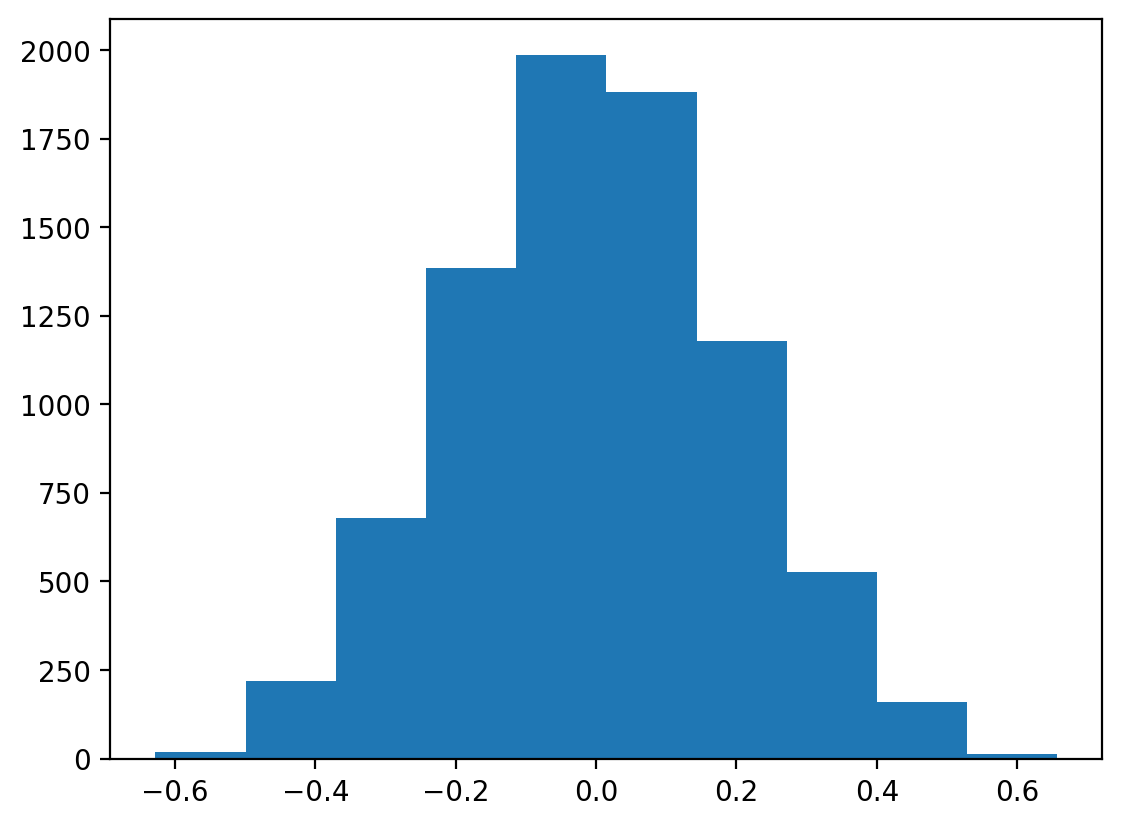

In [ ]:
#checking normality of residuals
#histogram of residual to observe the shape/skewness
plt.hist(model.resid)

# comments: unimodal, approx symmetric, 
# Comparison:
# model1_0(with influential points), Omnibus test stat is 6538.718 and JB test stat is 493185.215.
# model1_1(without influential points), omnibus test statistic is 838 and JB test statistic is 1487. 
# model2_1(without influentail points, transformed), omnibus test statistic is 31 and JB test statistic is 24 vs
#so normality assumption is improved significantly without influential points and improved
# further with transformation.


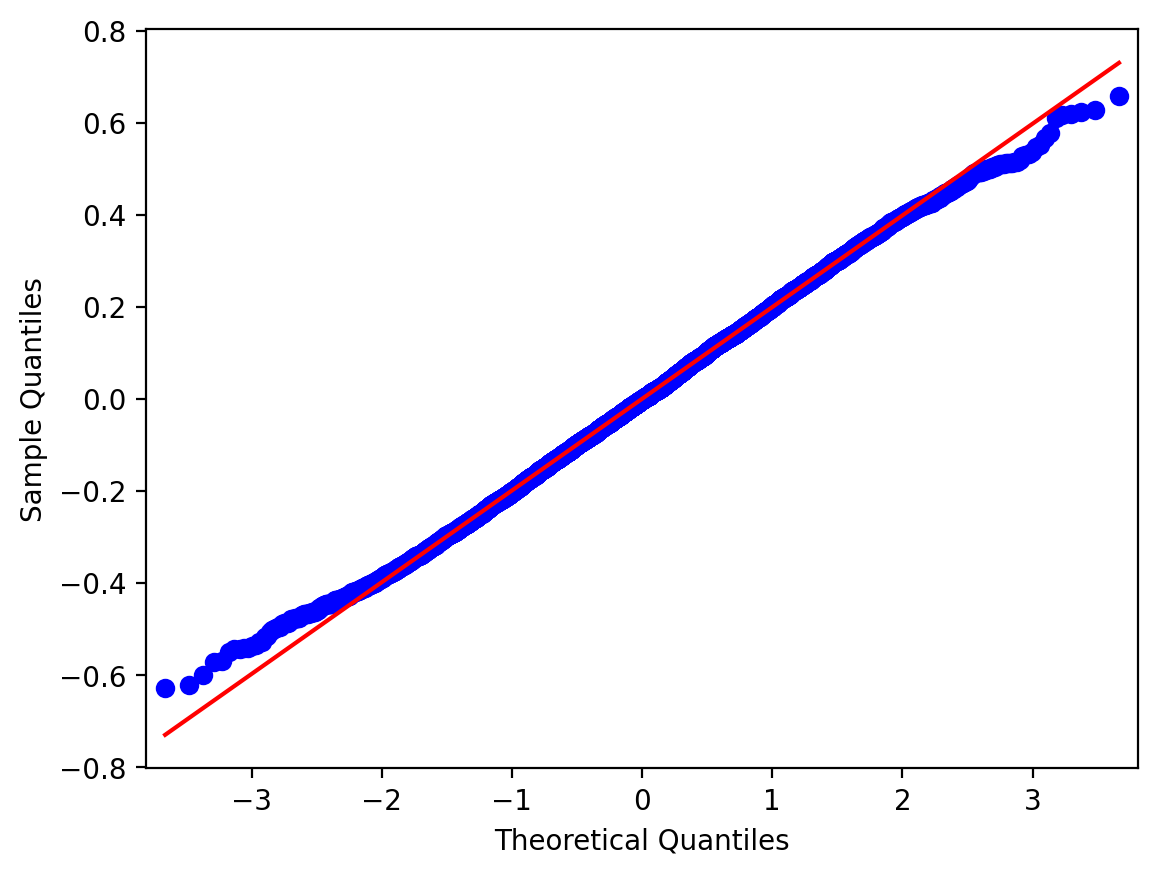

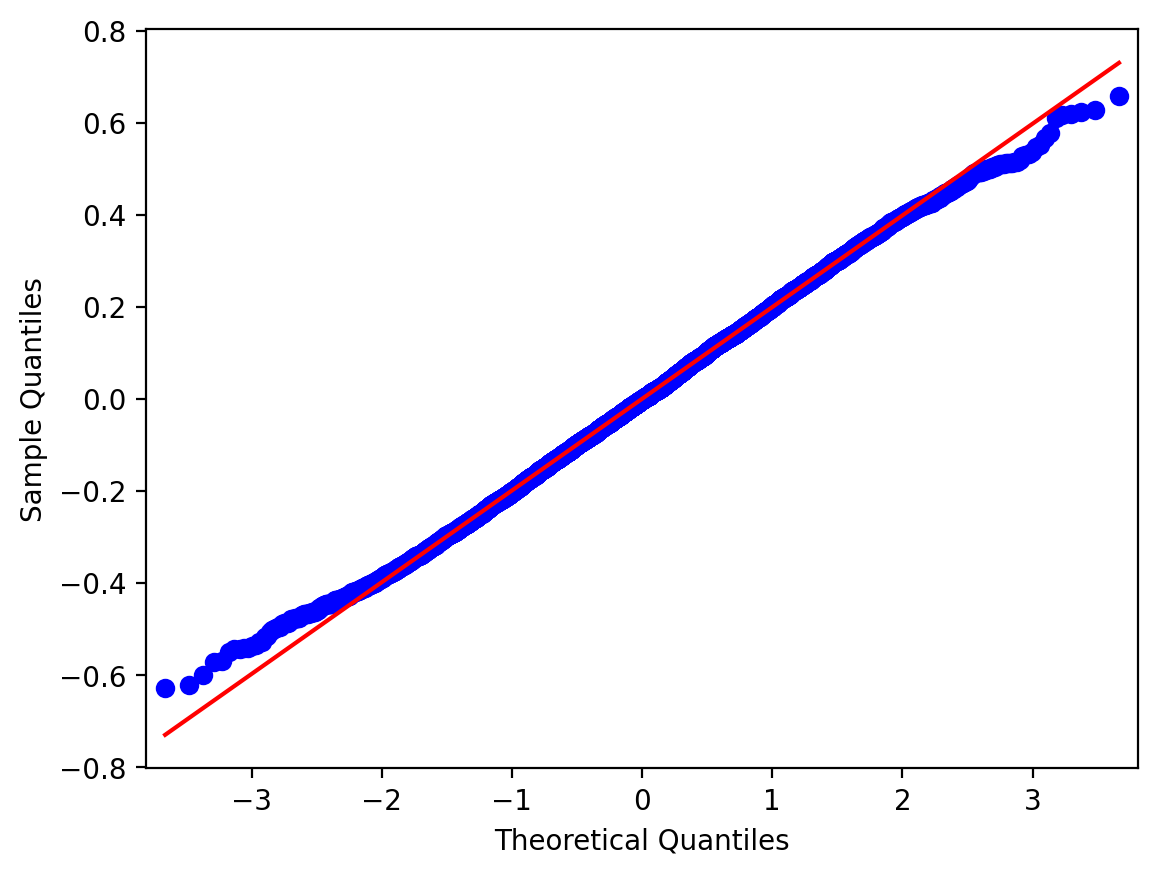

In [ ]:
#checking normality of residuals

sm.qqplot(model.resid, line="q")
# QQ plot to check for normality. Although the scale of axis is different for this plot, there
#appears to be less curvature at both ends in model2_1 compared to model1_1
# so normality assumption is improved.

# omnibus test, JB test, QQplot all agree and suggest normal assumption is violated.
#However, our sample size is ~8000 even with the initial model with influential points removed.
# so CLT guarantees that residuals is approximately normally distributed.
#

In [ ]:
#checking Heteroscedasticity

#Breusch-Pagan is for "systematic" Heteroscedasticity. A random pattern coudl pass BP test
#so also need to do residual plot.
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

#Comparison:
#BP p-value 8.26e-135 for model1_0 with infl pt and before transform
#after removing infl pt and log transform on y with model2_1, p value= 2.0e-52 
#so the degree of 'systematic' heteroscedasticity 
#seems to be reduced althought there is still significant Heteroscedasticity

{'LM Statistic': 311.59272206664286, 'LM-Test p-value': 2.064979204948403e-52}


Text(0.5, 1.0, 'Fitted Values vs. Residuals')

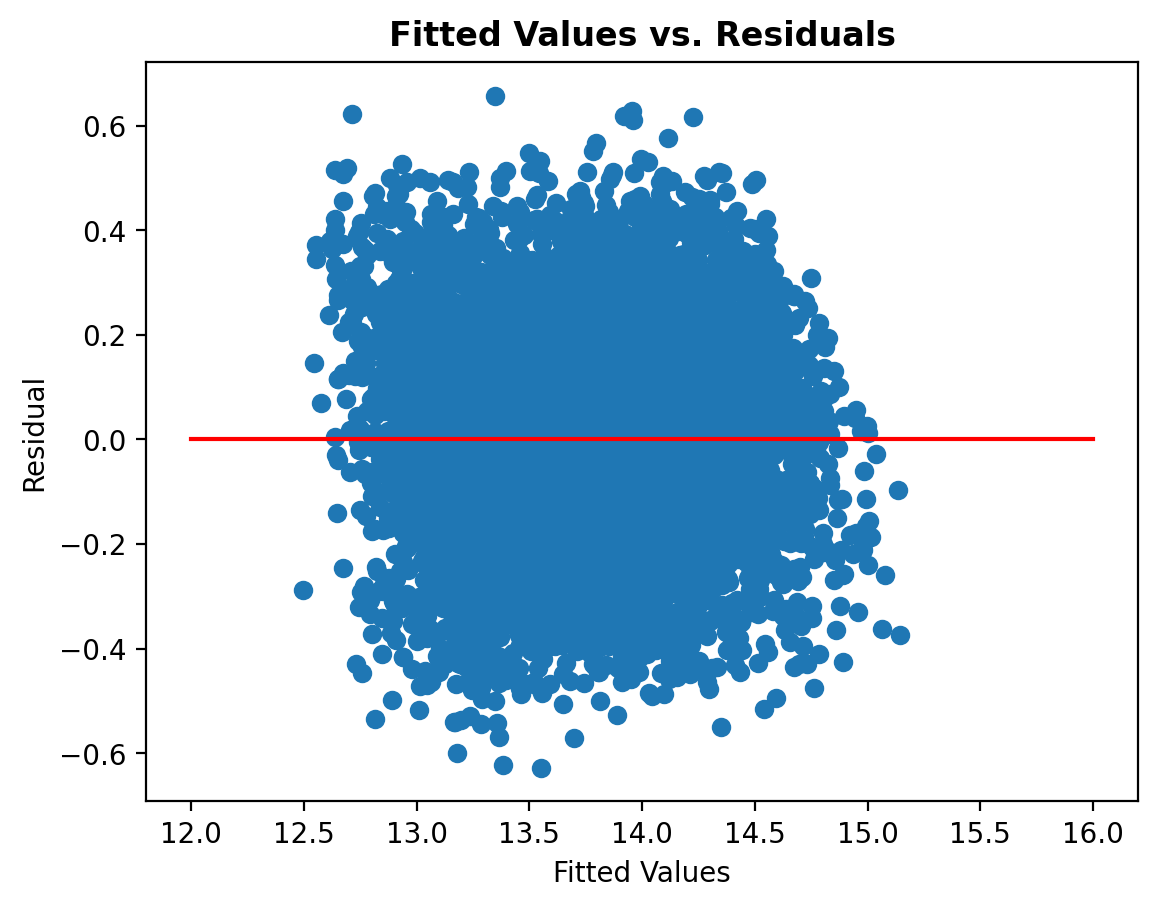

In [ ]:
#checking Heteroscedasticity and nonlinearity
#Fitted Values vs. Residuals Plot
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.plot([12,16],[0,0],'r')
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

#comment: the band width looks much more constant across the fitted values after log transform on y.
#From the residual plot, we can also comment on the linearity. The values look
#approximately evenly distributed about the 0 line.

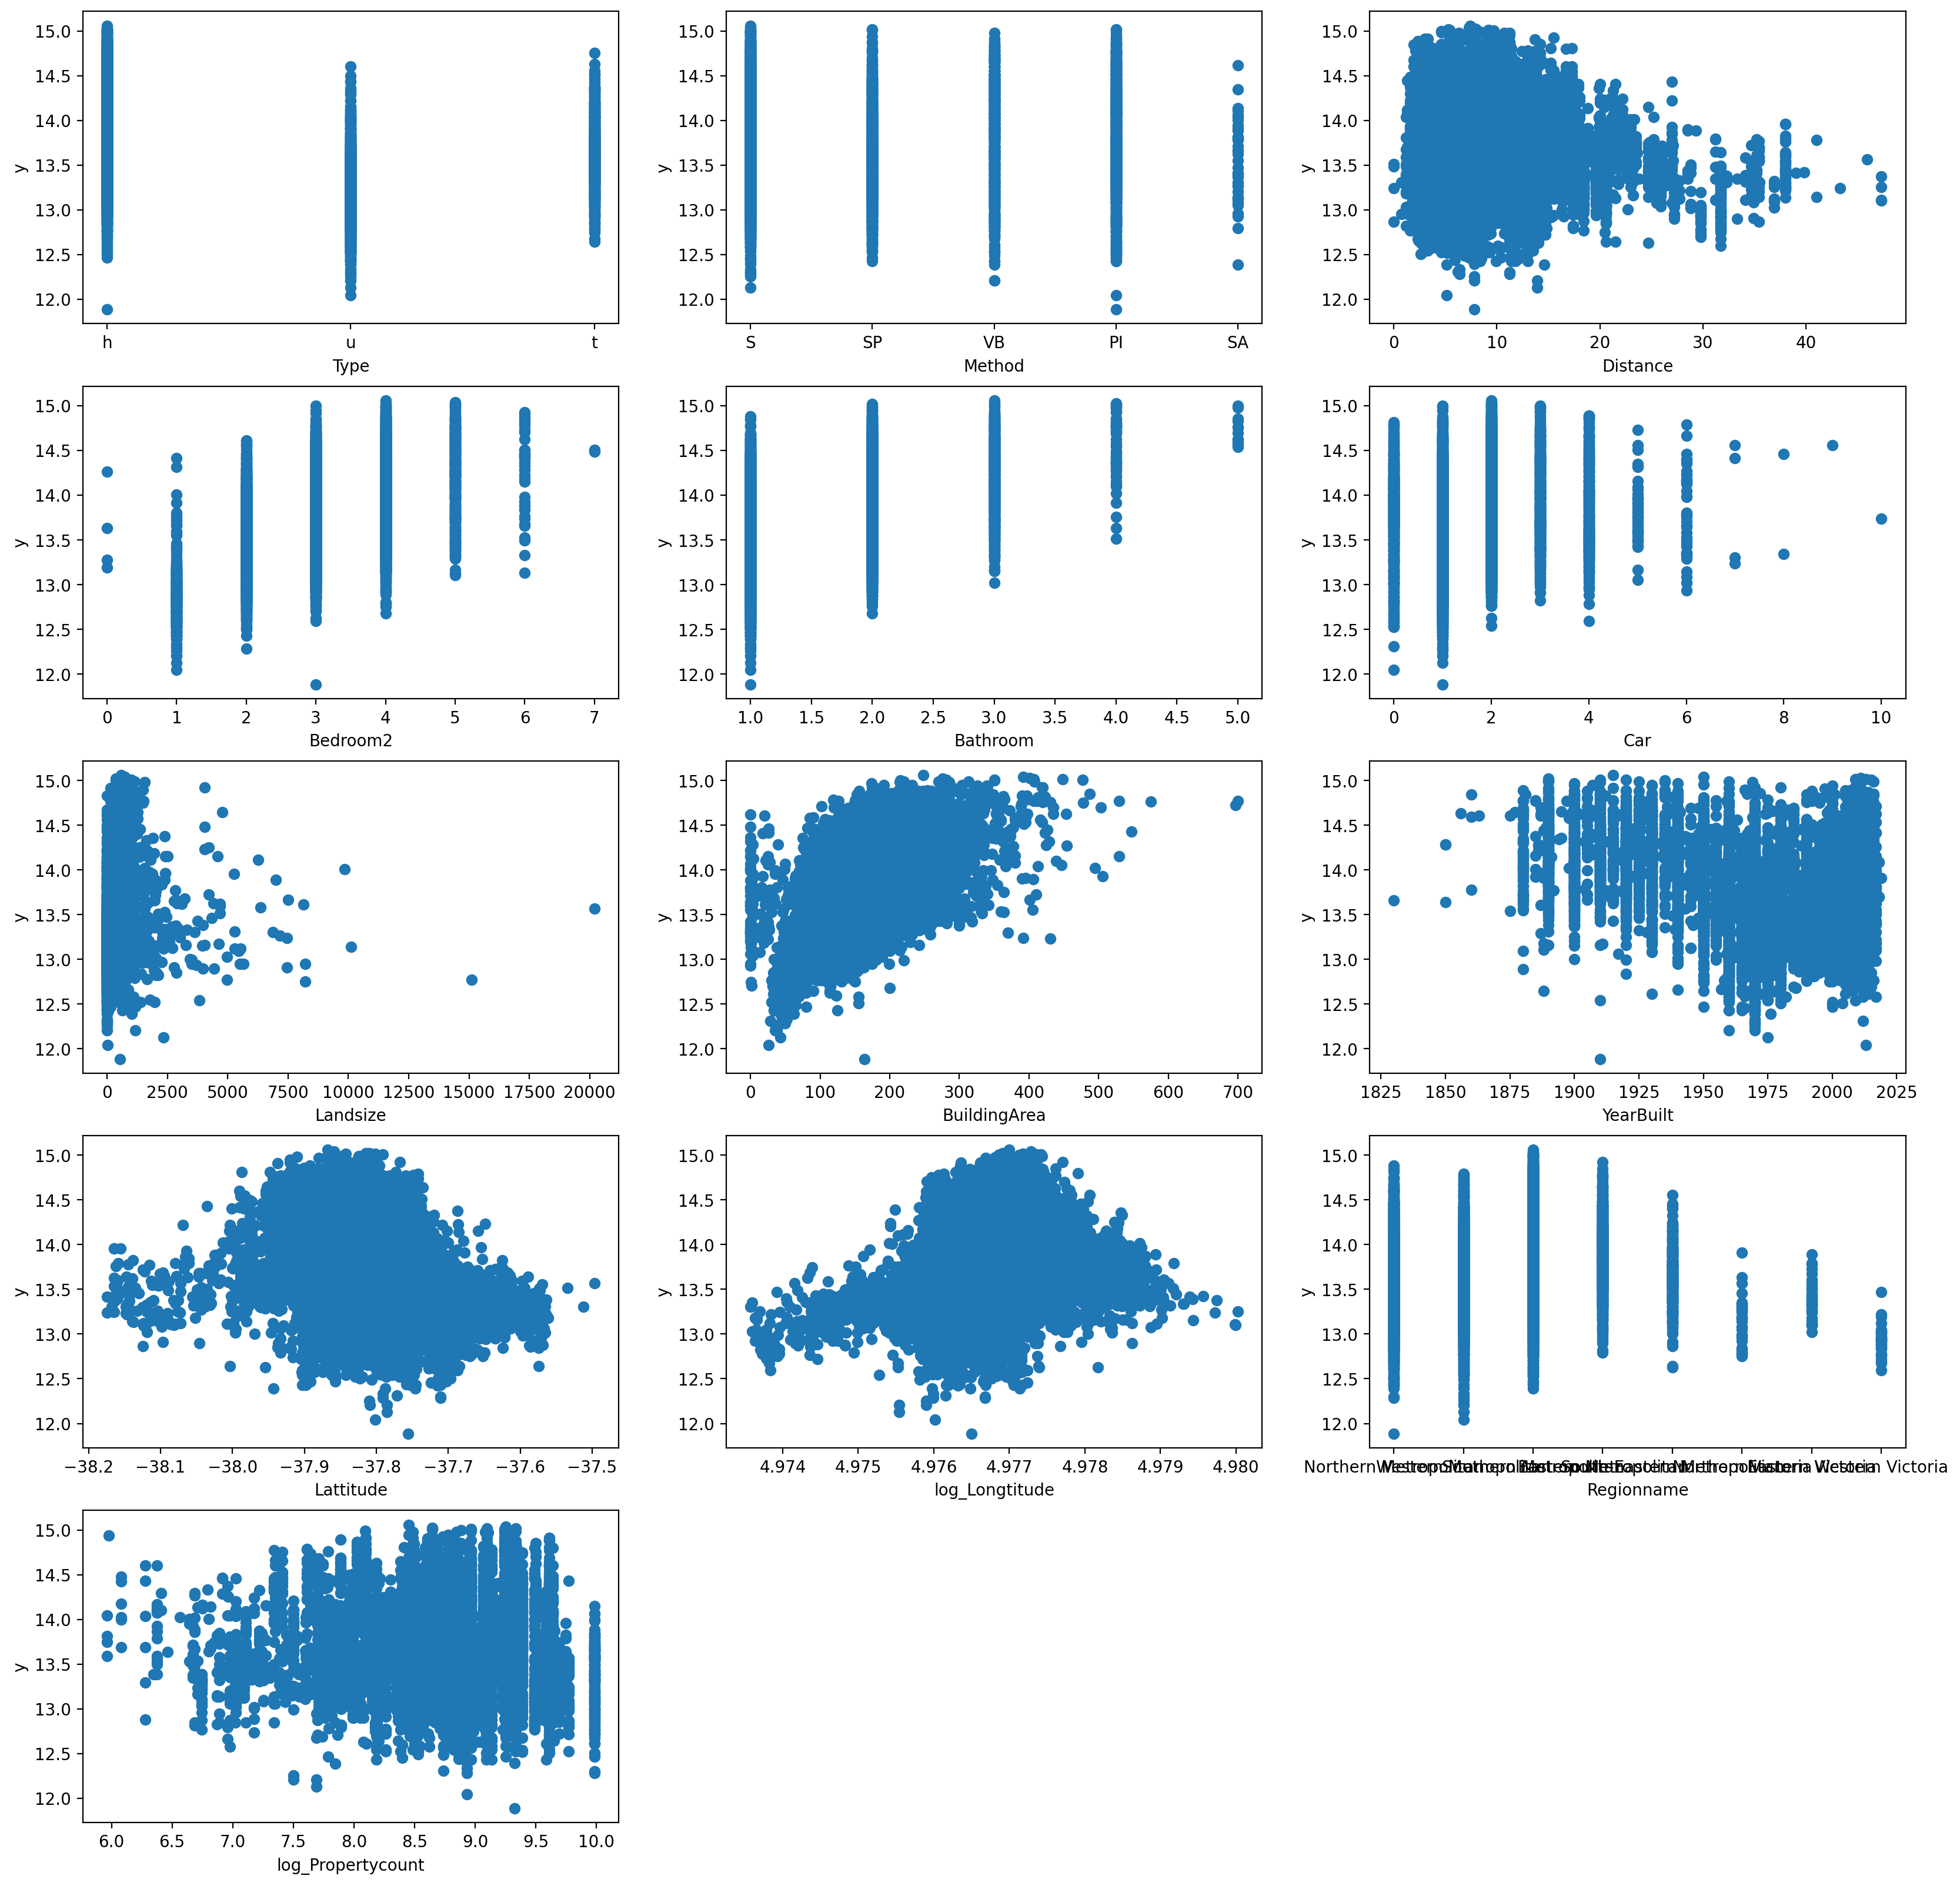

In [ ]:
#checking linearity

predictor=df[['Type',
 'Method',
 'Distance',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'log_Longtitude',
 'Regionname',
 'log_Propertycount']]
plt.figure(figsize=(20,20)) 
for i, col in enumerate(predictor.columns):
    plt.subplot(5, 3, i+1)
    x = predictor[col]
    y = df.log_price
    plt.plot(x, y, 'o' )
    #plt.title(col)
    plt.xlabel(col)
    plt.ylabel('y')

#comparison
    #when influential points were included and before log transform, all plots were nonlinear.
    #after removing influential points and log transform price, longtitude, propertycount,
    # linearity is improved.

    #linearity is improved for log_Longtitude and log_Propertycount. For other variables,
    #we were unable to do a log transformation because log transform turned some values to negative
    #infinity, which resulted in an LinAlgError when fitting the model.

## Model Selection

In [ ]:
# After second drop influential points and after log transform.
full_model='''log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ 
BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'''

In [ ]:
df_without_infl_pt.shape

(8046, 21)

In [ ]:
# There are too many possible subsets, so we don't use 'Best Subset'.
# AIC
# Backward: starting with full_model
# Direction: both

In [ ]:
model12_1 = 'log_price~C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_2 = 'log_price~C(Type)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_3 = 'log_price~C(Type)+C(Method)+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_4 = 'log_price~C(Type)+C(Method)+ Distance+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_5 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_6 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_7 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_8 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_9 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_10 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+log_Longtitude+ C(Regionname) + log_Propertycount'
model12_11 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+ C(Regionname) + log_Propertycount'
model12_12 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ log_Propertycount'
model12_13 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'

for i in range(1,14):
    print(f'aic for model12_{i} is: ',smf.ols(eval(f'model12_{i}'),data=df_without_infl_pt).fit().aic)

aic for model12_1 is:  -630.3707020384572
aic for model12_2 is:  -3064.6554255333867
aic for model12_3 is:  424.72180462126926
aic for model12_4 is:  -2858.7174791379584
aic for model12_5 is:  -3133.0117240509826
aic for model12_6 is:  -3189.941106803606
aic for model12_7 is:  -3235.4737793249515
aic for model12_8 is:  -1678.7430275622246
aic for model12_9 is:  -2438.8693673757807
aic for model12_10 is:  -2815.1609445368813
aic for model12_11 is:  -2641.511847628957
aic for model12_12 is:  -2414.3303121807803
aic for model12_13 is:  -3287.5484938885165


In [ ]:
#model12_13 has the smallest aic -3287.5
#choose model12_13:'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'

In [ ]:
#drop log_Propertycount
full_model='log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname) + log_Propertycount'
model11_1 = 'log_price~C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'
model11_2 = 'log_price~C(Type)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'
model11_3 = 'log_price~C(Type)+C(Method)+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'
model11_4 = 'log_price~C(Type)+C(Method)+ Distance+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'
model11_5 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'
model11_6 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom +Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'
model11_7 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car + BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'
model11_8 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'
model11_9 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ Lattitude+log_Longtitude+ C(Regionname)'
model11_10 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt +log_Longtitude+ C(Regionname)'
model11_11 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+ C(Regionname)'
model11_12 = 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude'

print(f'aic for full_model is: ',smf.ols(full_model,data=df_without_infl_pt).fit().aic)
for i in range(1,13):
    print(f'aic for model11_{i} is: ',smf.ols(eval(f'model11_{i}'),data=df_without_infl_pt).fit().aic)


aic for full_model is:  -3285.905460088459
aic for model11_1 is:  -626.0636974892659
aic for model11_2 is:  -3066.130447028212
aic for model11_3 is:  428.78816466192075
aic for model11_4 is:  -2860.1889178800557
aic for model11_5 is:  -3134.6923493242684
aic for model11_6 is:  -3191.643899985964
aic for model11_7 is:  -3236.9394232536542
aic for model11_8 is:  -1680.6774427932542
aic for model11_9 is:  -2439.9748302141343
aic for model11_10 is:  -2814.733430916167
aic for model11_11 is:  -2642.4199034599733
aic for model11_12 is:  -2415.159431031083


In [ ]:
# Aic all become larger. Stop. 
# Finally pick model12_13.
# 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'

In [ ]:
smf.ols(model12_13,data=df_without_infl_pt).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1890.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:23:15   Log-Likelihood:                 1666.8
No. Observations:                8046   AIC:                            -3288.
Df Residuals:                    8023   BIC:                            -3127.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    -757.1181     28.664    -26.414      0.000    -813.307    -700.929
C(Type)[T.t]                                   -0.1236      0.009    -13.337      0.000      -0.142      -0.105
C(Type)[T.u]                                   -0.4535      0.008    -55.566      0.000      -0.469      -0.437
C(Method)[T.S]                                  0.0804      0.007     11.486      0.000       0.067       0.094
C(Method)[T.SA]                                 0.0347      0.046      0.758      0.448      -0.055       0.124
C(Method)[T.SP]                                 0.0416      0.009      4.774      0.000       0.025       0.059
C(Method)[T.VB]                                -0.0082      0.010     -0.847      0.397      -0.027       0.011
C(Regionname)[T.Eastern Victoria]              -0.0857      0.039     -2.184      0.029      -0.163      -0.009
C(Regionname)[T.Northern Metropolitan]         -0.0570      0.011     -5.312      0.000      -0.078      -0.036
C(Regionname)[T.Northern Victoria]              0.3565      0.056      6.315      0.000       0.246       0.467
C(Regionname)[T.South-Eastern Metropolitan]    -0.0539      0.017     -3.200      0.001      -0.087      -0.021
C(Regionname)[T.Southern Metropolitan]          0.1220      0.010     12.806      0.000       0.103       0.141
C(Regionname)[T.Western Metropolitan]          -0.0319      0.014     -2.277      0.023      -0.059      -0.004
C(Regionname)[T.Western Victoria]               0.3701      0.051      7.245      0.000       0.270       0.470
Distance                                       -0.0376      0.001    -68.653      0.000      -0.039      -0.037
Bedroom2                                        0.0863      0.004     20.970      0.000       0.078       0.094
Bathroom                                        0.0600      0.005     12.486      0.000       0.051       0.069
Car                                             0.0268      0.003      9.911      0.000       0.022       0.032
Landsize                                     4.115e-05   5.67e-06      7.255      0.000       3e-05    5.23e-05
BuildingArea                                    0.0024   5.65e-05     42.142      0.000       0.002       0.002
YearBuilt                                      -0.0025   8.22e-05    -29.891      0.000      -0.003      -0.002
Lattitude                                      -0.9354      0.042    -22.084      0.000      -1.018      -0.852
log_Longtitude                                148.6908      5.736     25.922      0.000     137.447     159.935
==============================================================================
Omnibus:                       31.092   Durbin-Watson:                   1.724
Prob(Omnibus)

In [ ]:
smf.ols(full_model,data=df_without_infl_pt).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1808.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:23:15   Log-Likelihood:                 1667.0
No. Observations:                8046   AIC:                            -3286.
Df Residuals:                    8022   BIC:                            -3118.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    -756.8750     28.668    -26.401      0.000    -813.072    -700.678
C(Type)[T.t]                                   -0.1238      0.009    -13.348      0.000      -0.142      -0.106
C(Type)[T.u]                                   -0.4533      0.008    -55.506      0.000      -0.469      -0.437
C(Method)[T.S]                                  0.0803      0.007     11.471      0.000       0.067       0.094
C(Method)[T.SA]                                 0.0340      0.046      0.743      0.458      -0.056       0.124
C(Method)[T.SP]                                 0.0415      0.009      4.753      0.000       0.024       0.059
C(Method)[T.VB]                                -0.0083      0.010     -0.855      0.393      -0.027       0.011
C(Regionname)[T.Eastern Victoria]              -0.0859      0.039     -2.189      0.029      -0.163      -0.009
C(Regionname)[T.Northern Metropolitan]         -0.0560      0.011     -5.158      0.000      -0.077      -0.035
C(Regionname)[T.Northern Victoria]              0.3565      0.056      6.315      0.000       0.246       0.467
C(Regionname)[T.South-Eastern Metropolitan]    -0.0542      0.017     -3.215      0.001      -0.087      -0.021
C(Regionname)[T.Southern Metropolitan]          0.1224      0.010     12.817      0.000       0.104       0.141
C(Regionname)[T.Western Metropolitan]          -0.0321      0.014     -2.288      0.022      -0.060      -0.005
C(Regionname)[T.Western Victoria]               0.3696      0.051      7.232      0.000       0.269       0.470
Distance                                       -0.0376      0.001    -68.583      0.000      -0.039      -0.036
Bedroom2                                        0.0862      0.004     20.965      0.000       0.078       0.094
Bathroom                                        0.0600      0.005     12.487      0.000       0.051       0.069
Car                                             0.0269      0.003      9.913      0.000       0.022       0.032
Landsize                                     4.109e-05   5.67e-06      7.242      0.000       3e-05    5.22e-05
BuildingArea                                    0.0024   5.65e-05     42.143      0.000       0.002       0.002
YearBuilt                                      -0.0025   8.22e-05    -29.879      0.000      -0.003      -0.002
Lattitude                                      -0.9379      0.043    -22.033      0.000      -1.021      -0.854
log_Longtitude                                148.6262      5.737     25.905      0.000     137.379     159.873
log_Propertycount                              -0.0021      0.004     -0.597      0.551      -0.009       0.005
===========================================================

In [ ]:
#In the full model, t-test for log_Propertycount shows p_value = 0.551 > 0.05, so it is unsignificant.
#After dropping 'log_Propertycount', R-squared stays unchanged, but AIC and BIC all become smaller.

In [ ]:
# Orignal model with influential points and after log transform.
df = pd.read_csv('Melbourne_housing_FULL.csv')
origin_df = df.dropna()
origin_df.shape

(8887, 21)

In [ ]:
# AIC
# Backward: starting with full_model
# Direction: both
origin_df['log_Propertycount'] = np.log(origin_df['Propertycount'])
origin_df['log_price'] = np.log(origin_df['Price'])
origin_df['log_Longtitude'] = np.log(origin_df['Longtitude'])

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
for i in range(1,14):
    print(f'aic for model12_{i} is: ',smf.ols(eval(f'model12_{i}'),data=origin_df).fit().aic)

aic for model12_1 is:  3627.7893581086973
aic for model12_2 is:  1520.0139951300262
aic for model12_3 is:  4096.831706809302
aic for model12_4 is:  2009.8991693316966
aic for model12_5 is:  1820.7231339377904
aic for model12_6 is:  1529.973790942433
aic for model12_7 is:  1496.630416702781
aic for model12_8 is:  2066.1623471254497
aic for model12_9 is:  1961.5215050661718
aic for model12_10 is:  1615.7003615100148
aic for model12_11 is:  1659.4856456298512
aic for model12_12 is:  2498.001048814356
aic for model12_13 is:  1415.362074806606


In [ ]:
#model12_13 has the smallest aic 1415.4
#choose model12_13:'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'

In [ ]:
# drop log_Propertycount
print(f'aic for full_model is: ',smf.ols(full_model,data=origin_df).fit().aic)
for i in range(1,13):
    print(f'aic for model11_{i} is: ',smf.ols(eval(f'model11_{i}'),data=origin_df).fit().aic)

aic for full_model is:  1416.9373788934463
aic for model11_1 is:  3628.76153375626
aic for model11_2 is:  1518.2375752138141
aic for model11_3 is:  4105.334140359264
aic for model11_4 is:  2007.989342299068
aic for model11_5 is:  1819.3805173657638
aic for model11_6 is:  1528.487297104908
aic for model11_7 is:  1494.6769184659643
aic for model11_8 is:  2064.845146425756
aic for model11_9 is:  1960.0178879537416
aic for model11_10 is:  1616.8013302283107
aic for model11_11 is:  1657.4972184471662
aic for model11_12 is:  2496.0152246120015


In [ ]:
# Aic all become larger. Stop. 
# Finally pick model12_13.
# 'log_price~C(Type)+C(Method)+ Distance+ Bedroom2+ Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'

In [ ]:
smf.ols(model12_13,data=origin_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1284.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:23:21   Log-Likelihood:                -684.68
No. Observations:                8887   AIC:                             1415.
Df Residuals:                    8864   BIC:                             1578.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    -529.8510     33.148    -15.984      0.000    -594.829    -464.873
C(Type)[T.t]                                   -0.1484      0.012    -12.877      0.000      -0.171      -0.126
C(Type)[T.u]                                   -0.4989      0.010    -49.906      0.000      -0.519      -0.479
C(Method)[T.S]                                  0.0799      0.009      9.115      0.000       0.063       0.097
C(Method)[T.SA]                                 0.0408      0.034      1.198      0.231      -0.026       0.108
C(Method)[T.SP]                                 0.0478      0.011      4.361      0.000       0.026       0.069
C(Method)[T.VB]                                 0.0174      0.012      1.444      0.149      -0.006       0.041
C(Regionname)[T.Eastern Victoria]              -0.0503      0.042     -1.203      0.229      -0.132       0.032
C(Regionname)[T.Northern Metropolitan]         -0.1174      0.013     -8.895      0.000      -0.143      -0.092
C(Regionname)[T.Northern Victoria]              0.2924      0.039      7.472      0.000       0.216       0.369
C(Regionname)[T.South-Eastern Metropolitan]     0.0047      0.021      0.226      0.821      -0.036       0.045
C(Regionname)[T.Southern Metropolitan]          0.1446      0.012     12.199      0.000       0.121       0.168
C(Regionname)[T.Western Metropolitan]          -0.1062      0.017     -6.240      0.000      -0.140      -0.073
C(Regionname)[T.Western Victoria]               0.1616      0.050      3.259      0.001       0.064       0.259
Distance                                       -0.0354      0.001    -56.000      0.000      -0.037      -0.034
Bedroom2                                        0.1151      0.005     24.767      0.000       0.106       0.124
Bathroom                                        0.1111      0.005     20.356      0.000       0.100       0.122
Car                                             0.0346      0.003     10.751      0.000       0.028       0.041
Landsize                                     2.438e-05    2.7e-06      9.026      0.000    1.91e-05    2.97e-05
BuildingArea                                    0.0011   4.19e-05     25.966      0.000       0.001       0.001
YearBuilt                                      -0.0023   9.57e-05    -23.714      0.000      -0.002      -0.002
Lattitude                                      -0.7293      0.051    -14.327      0.000      -0.829      -0.630
log_Longtitude                                104.5220      6.652     15.712      0.000      91.482     117.562
==============================================================================
Omnibus:                     1120.669   Durbin-Watson:                   1.677
Prob(Omnibus)

In [ ]:
smf.ols(full_model,data=origin_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1228.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:23:21   Log-Likelihood:                -684.47
No. Observations:                8887   AIC:                             1417.
Df Residuals:                    8863   BIC:                             1587.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    -530.5198     33.165    -15.996      0.000    -595.531    -465.509
C(Type)[T.t]                                   -0.1482      0.012    -12.864      0.000      -0.171      -0.126
C(Type)[T.u]                                   -0.4992      0.010    -49.877      0.000      -0.519      -0.480
C(Method)[T.S]                                  0.0800      0.009      9.129      0.000       0.063       0.097
C(Method)[T.SA]                                 0.0414      0.034      1.215      0.224      -0.025       0.108
C(Method)[T.SP]                                 0.0480      0.011      4.380      0.000       0.027       0.069
C(Method)[T.VB]                                 0.0175      0.012      1.455      0.146      -0.006       0.041
C(Regionname)[T.Eastern Victoria]              -0.0503      0.042     -1.203      0.229      -0.132       0.032
C(Regionname)[T.Northern Metropolitan]         -0.1187      0.013     -8.894      0.000      -0.145      -0.093
C(Regionname)[T.Northern Victoria]              0.2932      0.039      7.488      0.000       0.216       0.370
C(Regionname)[T.South-Eastern Metropolitan]     0.0051      0.021      0.246      0.806      -0.035       0.046
C(Regionname)[T.Southern Metropolitan]          0.1440      0.012     12.114      0.000       0.121       0.167
C(Regionname)[T.Western Metropolitan]          -0.1059      0.017     -6.224      0.000      -0.139      -0.073
C(Regionname)[T.Western Victoria]               0.1629      0.050      3.283      0.001       0.066       0.260
Distance                                       -0.0354      0.001    -55.876      0.000      -0.037      -0.034
Bedroom2                                        0.1151      0.005     24.772      0.000       0.106       0.124
Bathroom                                        0.1111      0.005     20.349      0.000       0.100       0.122
Car                                             0.0346      0.003     10.746      0.000       0.028       0.041
Landsize                                     2.446e-05    2.7e-06      9.047      0.000    1.92e-05    2.98e-05
BuildingArea                                    0.0011   4.19e-05     25.959      0.000       0.001       0.001
YearBuilt                                      -0.0023   9.57e-05    -23.711      0.000      -0.002      -0.002
Lattitude                                      -0.7267      0.051    -14.230      0.000      -0.827      -0.627
log_Longtitude                                104.6713      6.656     15.725      0.000      91.623     117.719
log_Propertycount                               0.0029      0.004      0.651      0.515      -0.006       0.012
===========================================================

In [ ]:
#Comaprison: model selection results for data with and without influential points are the same. The Stepwise result also agrees with t-test.
#But the final R_square are different.
#R_square = 0.838 for data without influential points.
#R_square = 0.761 for data with influential points.
#For the same model selection result, data fits the model well after dropping influential points.

## Final Model and Interpretation

In [ ]:
#do prediction /interpretation work.
#for predicting y_hat, don't forget to undo the transformation that was done on y_hat.

No handles with labels found to put in legend.


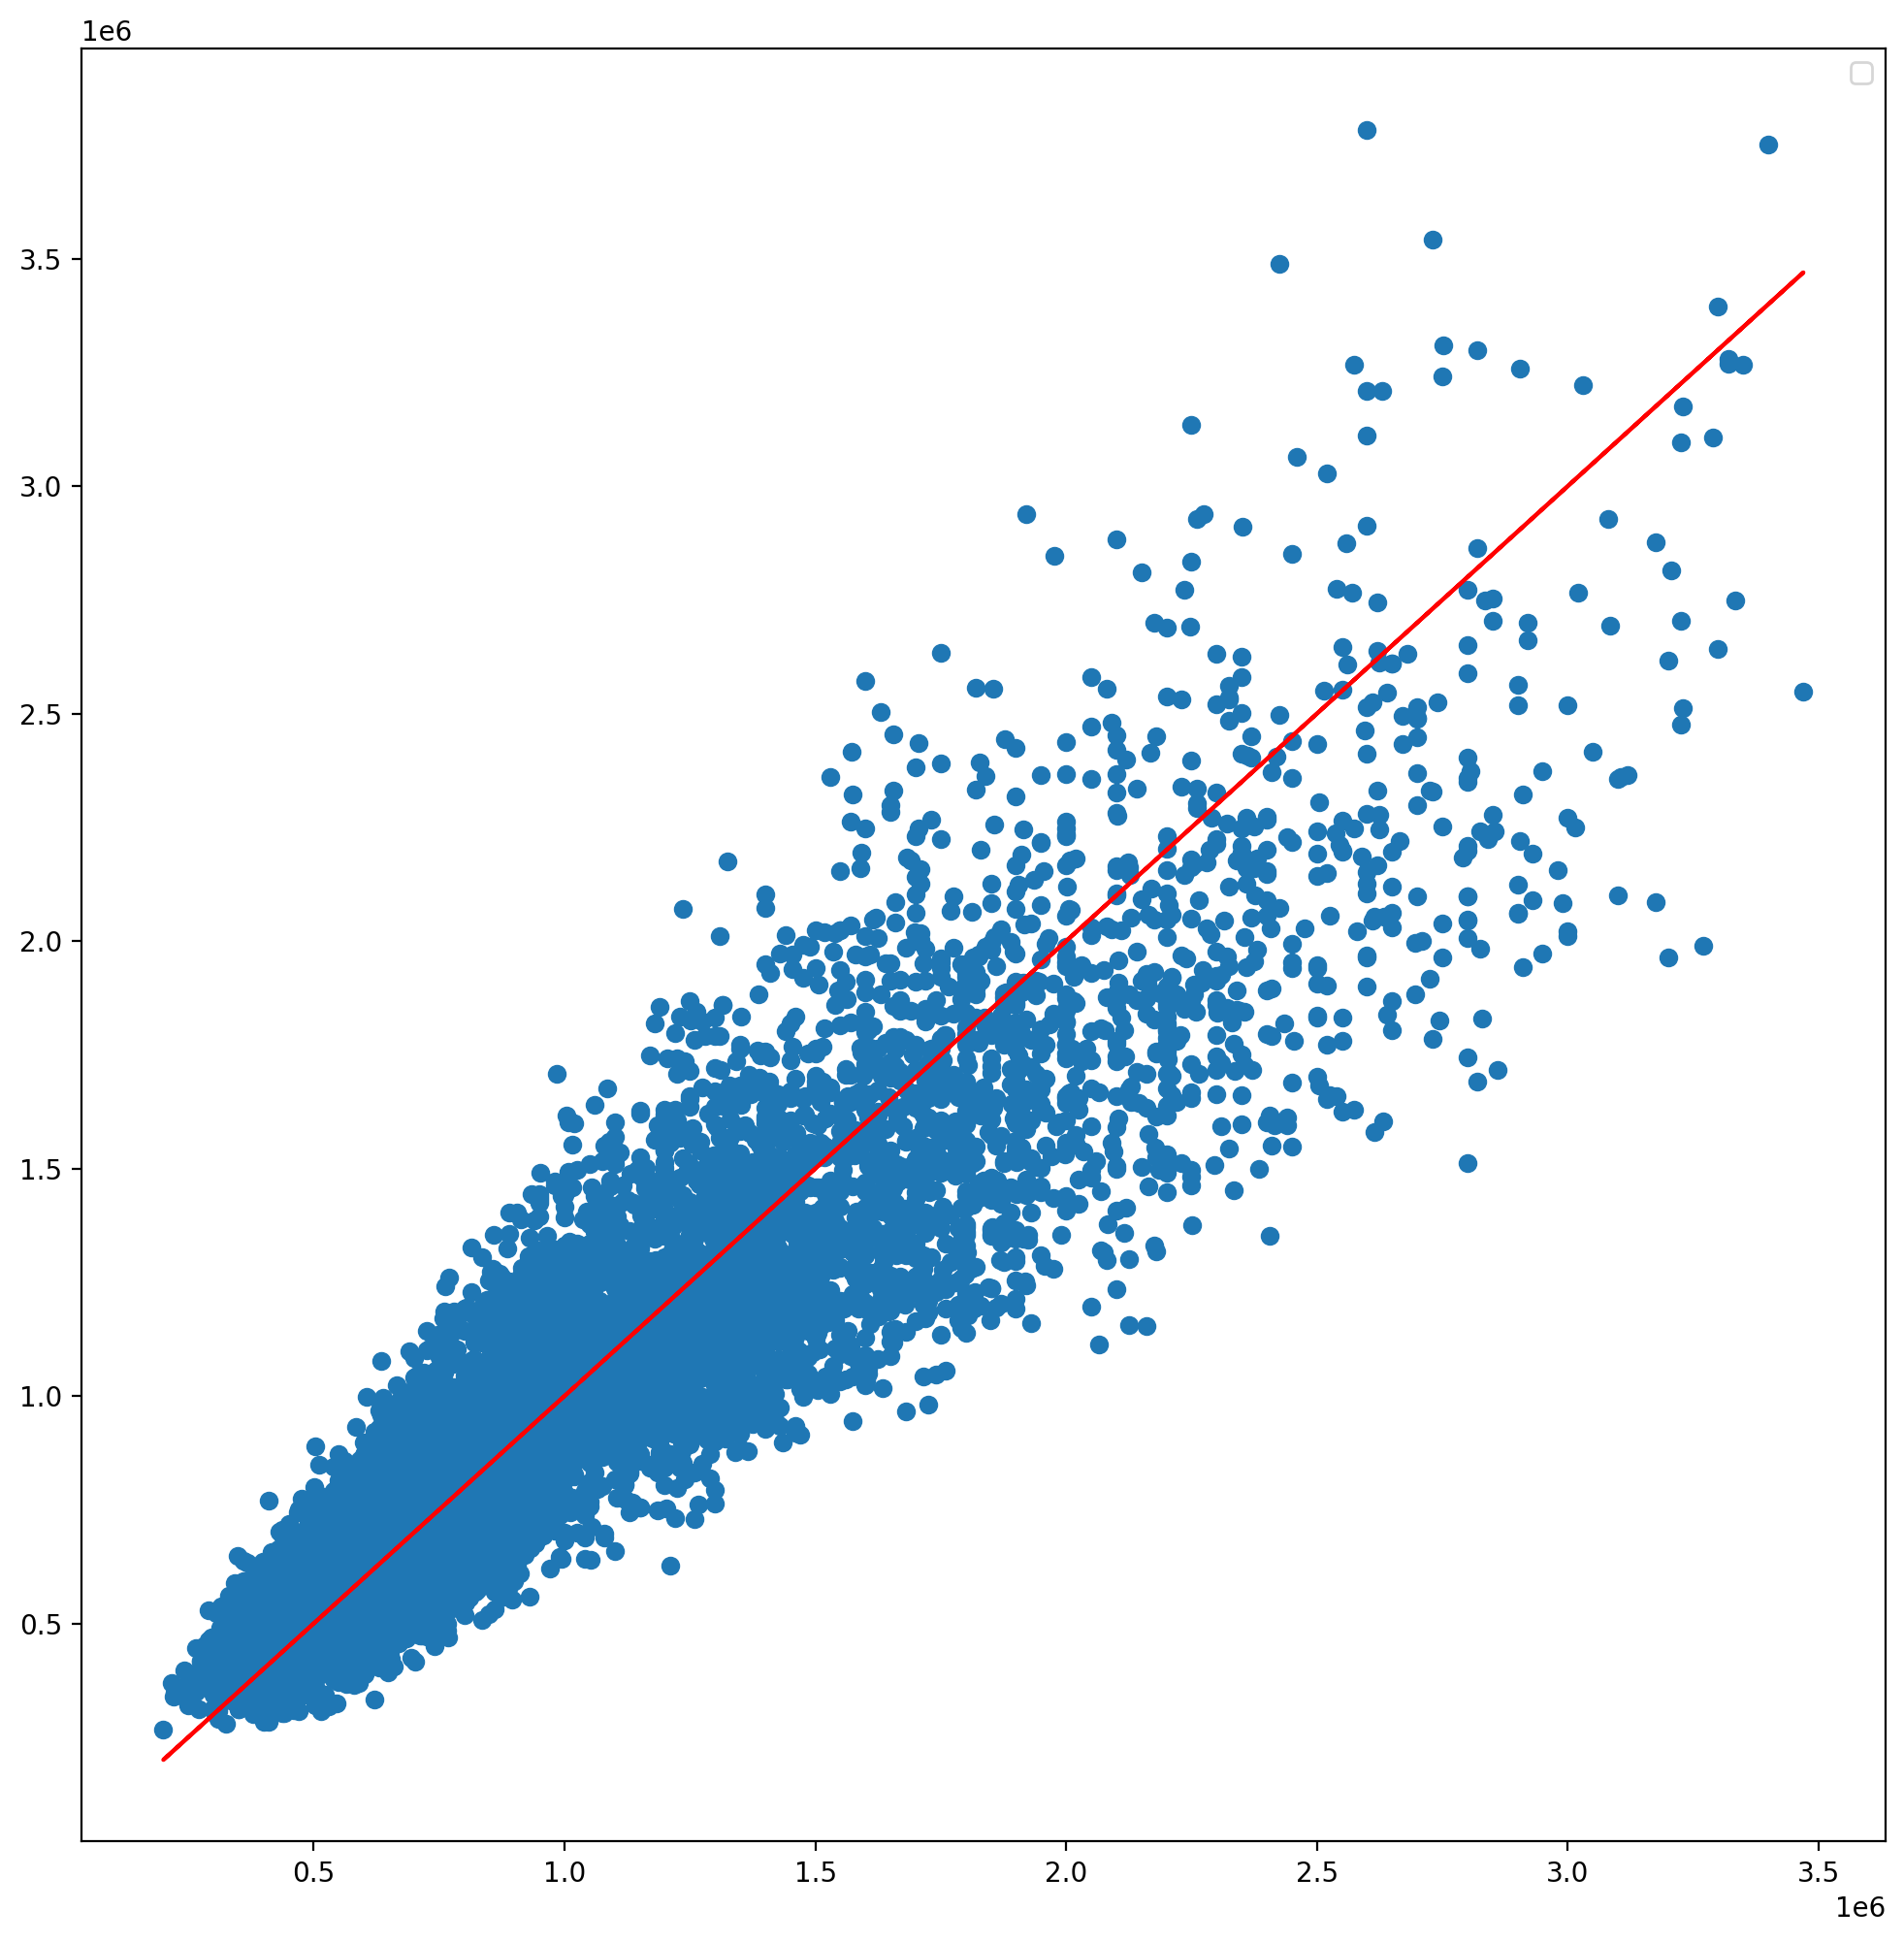

In [ ]:
model = '''log_price~C(Type)+C(Method)+ Distance+ Bedroom2+
 Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'''
fit_model = smf.ols(model,data=df_without_infl_pt).fit()
y_hat = np.exp(fit_model.fittedvalues)
plt.figure(figsize=(12,12))
plt.scatter(df_without_infl_pt['Price'],y_hat)


plt.legend()

In [ ]:
df_without_infl_pt.describe()

Price     Distance     Bedroom2     Bathroom          Car  \
count  8.046000e+03  8046.000000  8046.000000  8046.000000  8046.000000   
mean   1.041062e+06    10.838205     3.041014     1.606637     1.654362   
std    5.370172e+05     6.163591     0.914660     0.667081     0.923943   
min    2.000000e+05     0.000000     0.000000     1.000000     0.000000   
25%    6.492500e+05     6.400000     2.000000     1.000000     1.000000   
50%    8.910000e+05    10.100000     3.000000     2.000000     2.000000   
75%    1.310000e+06    13.900000     4.000000     2.000000     2.000000   
max    3.470000e+06    47.300000     7.000000     5.000000    10.000000   

          Landsize  BuildingArea    YearBuilt    Lattitude   Longtitude  \
count  8046.000000   8046.000000  8046.000000  8046.000000  8046.000000   
mean    460.986826    142.643920  1965.256028   -37.804034   144.991828   
std     420.004310     65.467716    36.065252     0.086039     0.113071   
min       0.000000      0.000000  1830.000000   -38.174360   144.545320   
25%     203.000000    100.000000  1940.000000   -37.856800   144.920177   
50%     456.000000    130.000000  1970.000000   -37.797105   144.997100   
75%     643.000000    175.000000  1999.000000   -37.749300   145.062987   
max    8140.000000    529.000000  2019.000000   -37.534460   145.477900   

       Propertycount    log_price  log_Distance  log_Landsize  \
count    8046.000000  8046.000000   8046.000000   8046.000000   
mean     7469.678722    13.734858          -inf          -inf   
std      4358.134504     0.489157           NaN           NaN   
min       389.000000    12.206073          -inf          -inf   
25%      4387.000000    13.383573      1.856298      5.313206   
50%      6567.000000    13.700100      2.312535      6.122493   
75%     10331.000000    14.085538      2.631889      6.466145   
max     21650.000000    15.059665      3.856510      9.004545   

       log_BuildingArea  log_YearBuilt  log_Longtitude  log_Propertycount  
count       8046.000000    8046.000000     8046.000000        8046.000000  
mean               -inf       7.583208        4.976677           8.732444  
std                 NaN       0.018441        0.000780           0.653556  
min                -inf       7.512071        4.973593           5.963579  
25%            4.605170       7.570443        4.976183           8.386401  
50%            4.867534       7.585789        4.976714           8.789812  
75%            5.164786       7.600402        4.977168           9.242904  
max            6.270988       7.610358        4.980024           9.982761

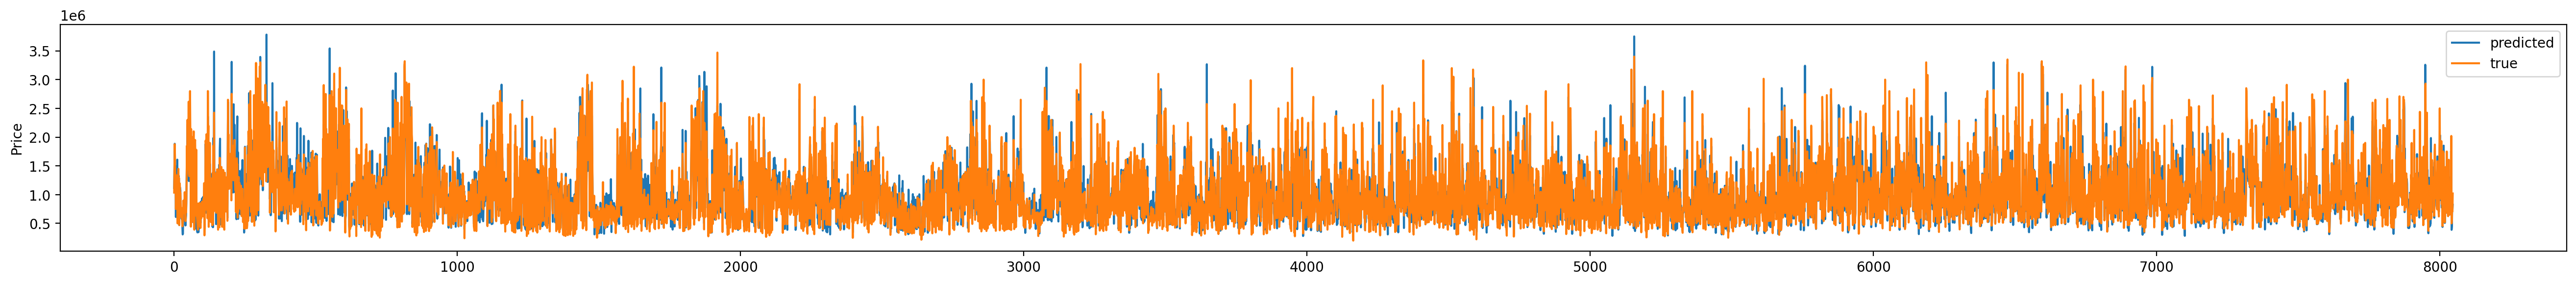

In [ ]:
# model prediction
model = '''log_price~C(Type)+C(Method)+ Distance+ Bedroom2+
 Bathroom+ Car+Landsize+ BuildingArea+ YearBuilt+ Lattitude+log_Longtitude+ C(Regionname)'''
fit_model = smf.ols(model,data=df_without_infl_pt).fit()
y_hat = np.exp(fit_model.fittedvalues)
plt.figure(figsize=(33,3))
plt.scatter(range(8046),y_hat,label = "predicted")
plt.plot(range(8046),df_without_infl_pt['Price'],label = "true")
plt.ylabel('Price')
plt.legend()

Text(0, 0.5, 'True price')

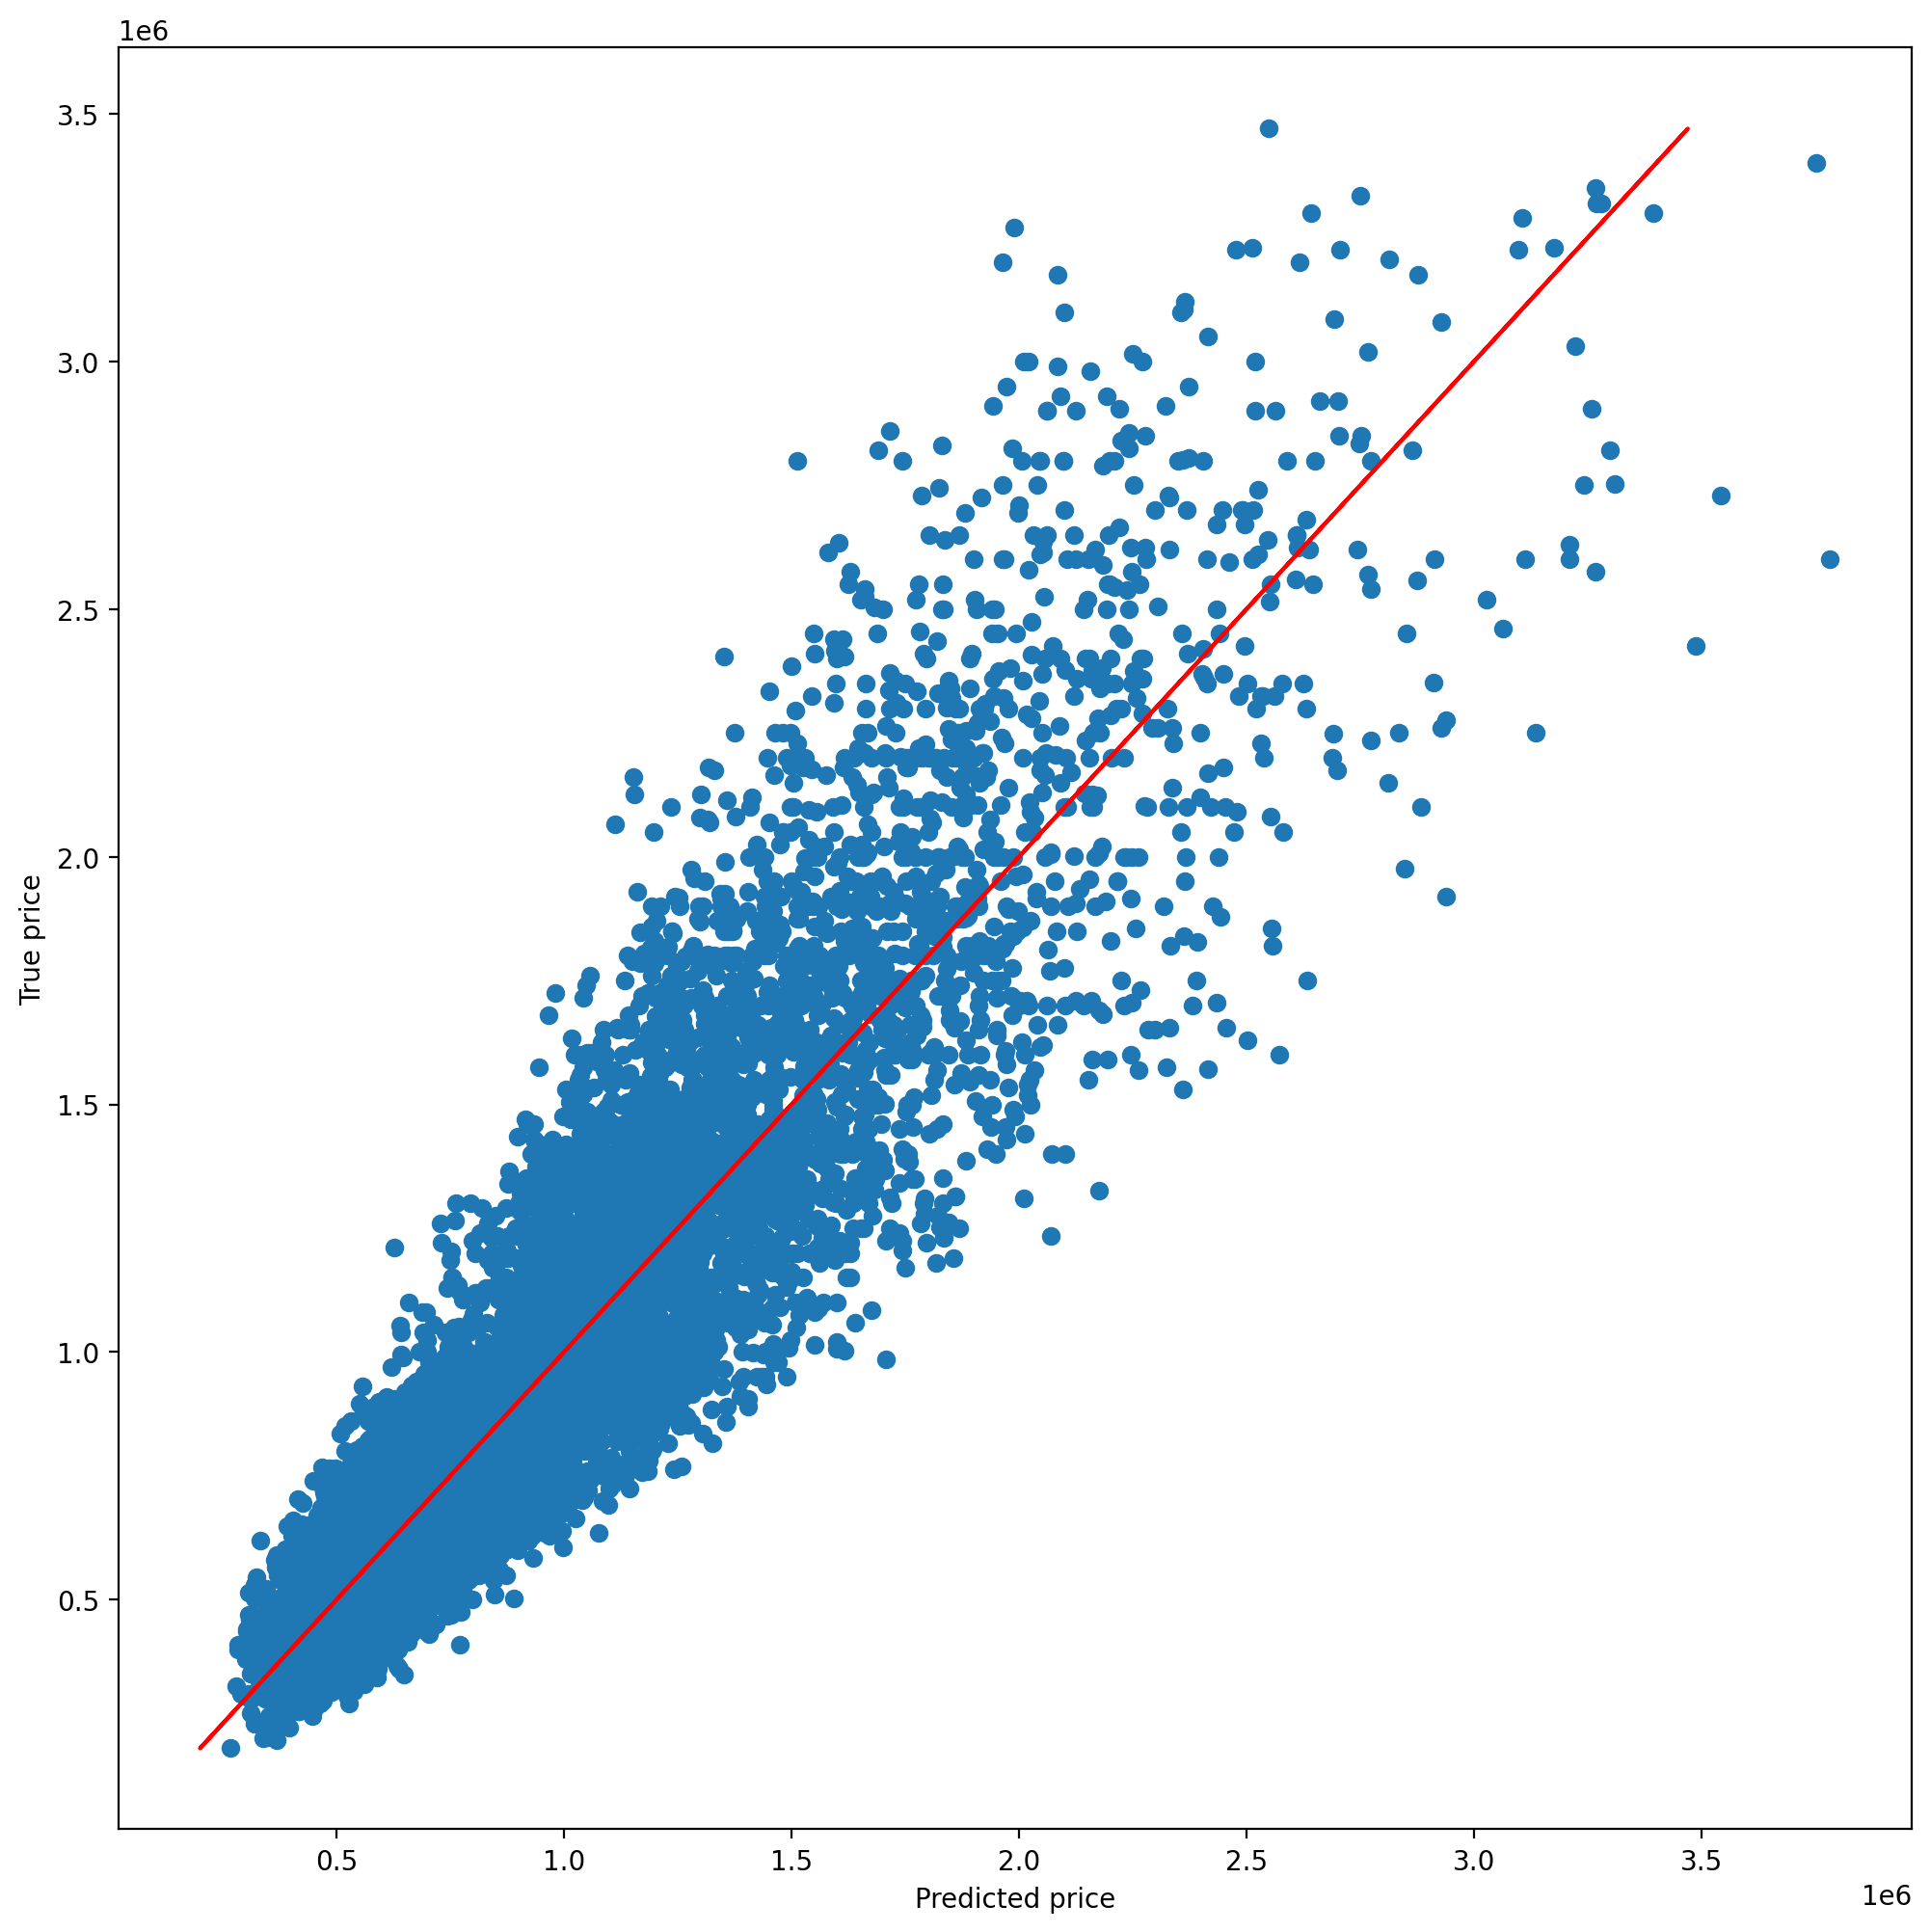

In [ ]:
#predicted vs true price

plt.figure(figsize=(12,12))
plt.scatter(y_hat,df_without_infl_pt['Price'])
plt.plot(df_without_infl_pt['Price'], df_without_infl_pt['Price'], c='red')
plt.xlabel('Predicted price')
plt.ylabel('True price')


In [ ]:
df_origin = pd.read_csv('Melbourne_housing_FULL.csv')
df_origin.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
# There are 7610 missing prices in the original dataset. 
# Drop na in predictors, 2630 data left.
# Use these data to do predictions.
df_miss_price = df_origin[df_origin.Price.isna()]
col = ['Type','Method', 'Distance','Bedroom2','Bathroom','Car','Landsize', 'BuildingArea', 'YearBuilt','Lattitude','log_Longtitude', 'Regionname']
df_miss_price['log_Longtitude']=np.log(df_miss_price['Longtitude'])
df_preds = df_miss_price[col]
df_preds = df_preds.dropna()
df_preds.shape

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(2630, 12)

In [ ]:
#Error converting data to categorical: observation with value 'SN' does not match any of the expected levels (expected: ['PI', 'S', ..., 'SP', 'VB'])
#delete rows with unseen Method values.
#An interesting finding: most houses sold by SN, W, PN, SS have missing data.
df_preds.Method.unique()

array(['SN', 'PI', 'W', 'SP', 'S', 'PN', 'VB', 'SS', 'SA'], dtype=object)

In [ ]:
df_without_infl_pt.Method.unique()

array(['S', 'SP', 'VB', 'PI', 'SA'], dtype=object)

In [ ]:
df_preds = df_preds[df_preds.Method.isin(df_without_infl_pt.Method.unique())]
df_preds.shape

(1936, 12)

In [ ]:
missings = np.exp(fit_model.predict(df_preds))
missings

12       6.535018e+05
20       1.035777e+06
31       6.847839e+05
39       1.221884e+06
69       6.605033e+05
             ...     
34798    4.026695e+06
34800    4.603518e+05
34803    8.243545e+05
34822    4.688489e+05
34850    4.169636e+05
Length: 1936, dtype: float64

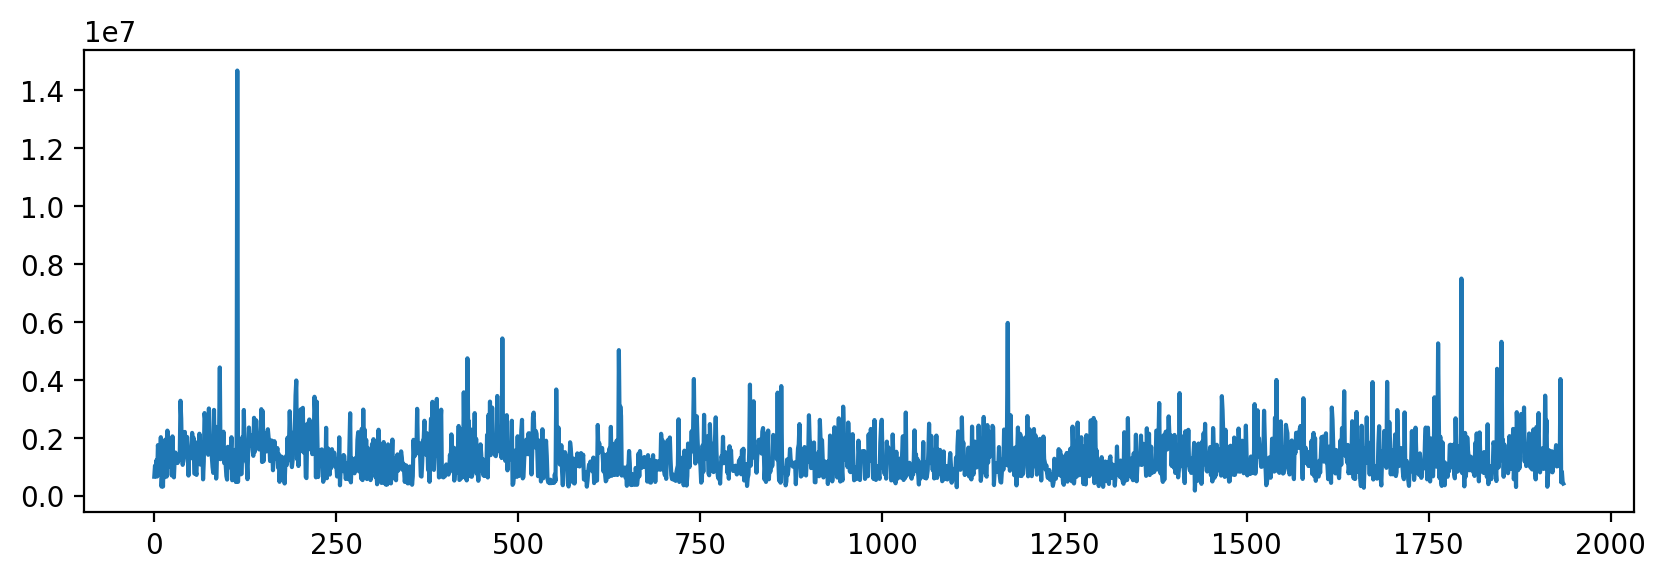

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(range(1936),missings)

In [ ]:
# Inference

In [ ]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1890.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        04:23:22   Log-Likelihood:                 1666.8
No. Observations:                8046   AIC:                            -3288.
Df Residuals:                    8023   BIC:                            -3127.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                    -757.1181     28.664    -26.414      0.000    -813.307    -700.929
C(Type)[T.t]                                   -0.1236      0.009    -13.337      0.000      -0.142      -0.105
C(Type)[T.u]                                   -0.4535      0.008    -55.566      0.000      -0.469      -0.437
C(Method)[T.S]                                  0.0804      0.007     11.486      0.000       0.067       0.094
C(Method)[T.SA]                                 0.0347      0.046      0.758      0.448      -0.055       0.124
C(Method)[T.SP]                                 0.0416      0.009      4.774      0.000       0.025       0.059
C(Method)[T.VB]                                -0.0082      0.010     -0.847      0.397      -0.027       0.011
C(Regionname)[T.Eastern Victoria]              -0.0857      0.039     -2.184      0.029      -0.163      -0.009
C(Regionname)[T.Northern Metropolitan]         -0.0570      0.011     -5.312      0.000      -0.078      -0.036
C(Regionname)[T.Northern Victoria]              0.3565      0.056      6.315      0.000       0.246       0.467
C(Regionname)[T.South-Eastern Metropolitan]    -0.0539      0.017     -3.200      0.001      -0.087      -0.021
C(Regionname)[T.Southern Metropolitan]          0.1220      0.010     12.806      0.000       0.103       0.141
C(Regionname)[T.Western Metropolitan]          -0.0319      0.014     -2.277      0.023      -0.059      -0.004
C(Regionname)[T.Western Victoria]               0.3701      0.051      7.245      0.000       0.270       0.470
Distance                                       -0.0376      0.001    -68.653      0.000      -0.039      -0.037
Bedroom2                                        0.0863      0.004     20.970      0.000       0.078       0.094
Bathroom                                        0.0600      0.005     12.486      0.000       0.051       0.069
Car                                             0.0268      0.003      9.911      0.000       0.022       0.032
Landsize                                     4.115e-05   5.67e-06      7.255      0.000       3e-05    5.23e-05
BuildingArea                                    0.0024   5.65e-05     42.142      0.000       0.002       0.002
YearBuilt                                      -0.0025   8.22e-05    -29.891      0.000      -0.003      -0.002
Lattitude                                      -0.9354      0.042    -22.084      0.000      -1.018      -0.852
log_Longtitude                                148.6908      5.736     25.922      0.000     137.447     159.935
==============================================================================
Omnibus:                       31.092   Durbin-Watson:                   1.724
Prob(Omnibus)

In [ ]:
df_without_infl_pt.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [ ]:
# For every 1% increase in the Longtitude, price increases by about 339.1%.
# If the lattitude increase 0.1, the average price will decrease 9.81%
np.exp(0.09354)-1,np.exp(148.69 * np.log(1.01) )-1

(0.09805452464385334, 3.390814277704102)

In [ ]:
df_without_infl_pt.Method.unique()

array(['S', 'SP', 'VB', 'PI', 'SA'], dtype=object)

In [ ]:
df_without_infl_pt.Regionname.unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Northern Victoria',
       'Eastern Victoria', 'Western Victoria'], dtype=object)

In [ ]:
#Final fitted fuction:
#log_price = -757.1181 - 0.1236*Type_t - 0.4535*Type_u + 0.0804*Method_S + 0.0347*Method_SA + 0.0416*Method_SP - 0.0082*Method_VB
#-0.0376*Distance+ 0.0863*Bedroom2+ 0.06*Bathroom+ 0.0268*Car + 4.115e-05*Landsize + 0.0024*BuildingArea -0.0025*YearBuilt -0.9354*Lattitude + 148.6908*log_Longtitude+ 
#-0.0857*Region_Eastern_Victoria - 0.0570*Region_Northern_Metropolitan + 0.3565*Region_Northern_Victoria - 0.0539*Region_South-Eastern_Metropolitan + 0.1220*Region_Southern_Metropolitan - 0.0319*Region_Western_Metropolitan + 0.3701*Region_Western_Victoria


In [ ]:
#Categorial variables

#Type: 'h' ,'u' ,'t' (choose 'h' as the reference level)
# Among all types (house, unit, townhouse), house are the most expensive and units are the least expensive.
# Given all other predictors are the same, the average price will increase 13.16% if we choose houses instead of townhouses, and the price will increase 57.38% if we buy houses instead of uints.

#Method: 'S', 'SP', 'VB', 'PI', 'SA' (choose 'PI' as the reference level)
# Among all selling methods, houses from property sold are the most expensive. Houses sold by vendor bid tends to have the lowest price. 
# The average house price sold by property sold will increase 9.26% compared with vender bid.

#Regionname:'Northern Metropolitan', 'Western Metropolitan', 'Southern Metropolitan', 'Eastern Metropolitan', 'South-Eastern Metropolitan', 'Northern Victoria', 'Eastern Victoria', 'Western Victoria' (choose 'Eastern Metropolitan' as the reference level)
# Houses in Western Victoria Region are the most expensive.
# Houses in Eastern Victoria Region are the least expensive.
# The house price in Western Victoria Region is on average 57.74% higher than houses in Eastern Victoria Region.


In [ ]:
#growth rate of price
np.exp(0.1236)-1, np.exp(0.4535)-1, np.exp(0.0804+0.0082)-1, np.exp(0.3701+0.0857)-1

(0.13156315519997164,
 0.573810895268231,
 0.09264351149859373,
 0.5774348262504279)

In [ ]:
#The intercept is -757.12, it means given all predictors are 0, the price should be $0 (np.exp(-757.1181))
#Price is directly proportional to the number of Bedrooms and Bathrooms. Houses with more bedrooms and bathrooms are more expensive. If the house has one more bedroom, price will on average increase 9%. If the house has one more bathroom, price will increase 6.2% on average.
#Houses that are close to CBD tend to have higher price.If the house is 10 km closer to CBD, price will on average increase 45.64%.
#Houses with more carspots are more expensive. If the house has one more carspot, price will increase 2.72% on average.
#Houses with larger building area and landsize are more expensive. If the buildingsize is 10 square meter larger, price will on average increase 2.43%. 
#New houses tend to be less expesive. If the house's age is ten year older (Yearbuilt), price will on average increase 2.53%.


In [ ]:
#growth rate in price
np.exp(0.0863)-1,np.exp(0.06)-1,np.exp(0.376)-1,np.exp(0.0268)-1,np.exp(0.024)-1,np.exp(0.025)-1

(0.0901333192498095,
 0.06183654654535964,
 0.45644713377108603,
 0.027162349748923065,
 0.024290317890621527,
 0.025315120524428858)

In [ ]:
origin_df.sample(5)

Suburb             Address  Rooms Type      Price Method  \
14014       Carlton  20/264 Drummond St      1    u   490000.0      S   
22150  Williamstown      54 Victoria St      5    h  2550000.0     PI   
4470      Footscray          65 Hyde St      3    h   740000.0     SP   
3060      Caulfield      4/14 Briggs St      2    u   550000.0     VB   
24875     Bentleigh        4 Paschal St      4    h  1560000.0      S   

             SellerG        Date  Distance  Postcode  ...  BuildingArea  \
14014  hockingstuart  29/04/2017       1.8    3053.0  ...          51.0   
22150       Williams  19/08/2017       6.8    3016.0  ...         244.0   
4470             Jas  25/02/2017       6.4    3011.0  ...          94.0   
3060            Gary   4/03/2017       8.9    3162.0  ...          78.0   
24875         Buxton  21/10/2017      11.4    3204.0  ...         250.0   

       YearBuilt               CouncilArea  Lattitude  Longtitude  \
14014     2009.0    Melbourne City Council  -37.79980   144.96890   
22150     1910.0  Hobsons Bay City Council  -37.86330   144.88871   
4470      1910.0  Maribyrnong City Council  -37.80590   144.90100   
3060      1960.0    Glen Eira City Council  -37.88520   145.02400   
24875     2017.0    Glen Eira City Council  -37.92967   145.04474   

                  Regionname Propertycount  log_Propertycount  log_price  \
14014  Northern Metropolitan        6786.0           8.822617  13.102161   
22150   Western Metropolitan        6380.0           8.760923  14.751604   
4470    Western Metropolitan        7570.0           8.931948  13.514405   
3060   Southern Metropolitan        2379.0           7.774436  13.217674   
24875  Southern Metropolitan        6795.0           8.823942  14.260196   

      log_Longtitude  
14014       4.976519  
22150       4.975966  
4470        4.976051  
3060        4.976899  
24875       4.977042  

[5 rows x 24 columns]

In [ ]:
#Inspect infulential points

In [ ]:
infl_data = infl_data[['Price', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount']]
infl_data

Price Type Method  Distance  Bedroom2  Bathroom  Car  Landsize  \
135    2850000.0    h     PI       3.3       3.0       2.0  0.0     211.0   
166    3010000.0    h      S       3.3       3.0       2.0  0.0     147.0   
178    4735000.0    h      S       3.3       4.0       2.0  1.0     330.0   
202    2840000.0    h      S       6.4       5.0       4.0  4.0     809.0   
284    1085000.0    h      S      11.1       5.0       3.0  6.0     592.0   
...          ...  ...    ...       ...       ...       ...  ...       ...   
34750   557000.0    h      S      31.7       3.0       2.0  2.0     689.0   
34752   556000.0    h      S      31.7       3.0       2.0  2.0     702.0   
34787  1400000.0    t     PI       7.0       3.0       2.0  2.0     219.0   
34807  1050000.0    h      S       8.9       5.0       3.0  2.0     576.0   
34823   640000.0    h      S      14.7       5.0       2.0  4.0     580.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude             Regionname  \
135           198.0     1890.0  -37.84810   144.94990  Southern Metropolitan   
166           146.0     1890.0  -37.84730   144.95510  Southern Metropolitan   
178           207.0     1910.0  -37.84770   144.95580  Southern Metropolitan   
202           165.0     1910.0  -37.77500   145.02680  Northern Metropolitan   
284           251.0     1965.0  -37.83880   144.85670   Western Metropolitan   
...             ...        ...        ...         ...                    ...   
34750         164.0     1988.0  -37.57328   144.69800   Western Metropolitan   
34752         139.0     1998.0  -37.56438   144.70907   Western Metropolitan   
34787         180.0     2016.0  -37.75982   145.00450  Northern Metropolitan   
34807         208.0     1977.0  -37.73713   145.08957   Eastern Metropolitan   
34823         218.0     1970.0  -37.90145   144.66978   Western Metropolitan   

       Propertycount  
135           3280.0  
166           3280.0  
178           3280.0  
202           2211.0  
284           5132.0  
...              ...  
34750        14092.0  
34752        14092.0  
34787         8870.0  
34807         2698.0  
34823        16166.0  

[841 rows x 14 columns]

In [ ]:
infl_data[['Bedroom2','Bathroom','Landsize','BuildingArea']].describe()

Bedroom2    Bathroom      Landsize  BuildingArea
count  841.000000  841.000000    841.000000    841.000000
mean     3.434007    2.027348   1121.367420    213.080071
std      1.313206    1.042188   3135.444398    190.357538
min      0.000000    1.000000      0.000000      0.000000
25%      3.000000    1.000000    365.000000    106.000000
50%      3.000000    2.000000    616.000000    167.000000
75%      4.000000    2.000000    808.000000    280.000000
max     12.000000    9.000000  42800.000000   3112.000000

In [ ]:
df_without_infl_pt[['Price', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount']].describe()

Price     Distance     Bedroom2     Bathroom          Car  \
count  8.046000e+03  8046.000000  8046.000000  8046.000000  8046.000000   
mean   1.041062e+06    10.838205     3.041014     1.606637     1.654362   
std    5.370172e+05     6.163591     0.914660     0.667081     0.923943   
min    2.000000e+05     0.000000     0.000000     1.000000     0.000000   
25%    6.492500e+05     6.400000     2.000000     1.000000     1.000000   
50%    8.910000e+05    10.100000     3.000000     2.000000     2.000000   
75%    1.310000e+06    13.900000     4.000000     2.000000     2.000000   
max    3.470000e+06    47.300000     7.000000     5.000000    10.000000   

          Landsize  BuildingArea    YearBuilt    Lattitude   Longtitude  \
count  8046.000000   8046.000000  8046.000000  8046.000000  8046.000000   
mean    460.986826    142.643920  1965.256028   -37.804034   144.991828   
std     420.004310     65.467716    36.065252     0.086039     0.113071   
min       0.000000      0.000000  1830.000000   -38.174360   144.545320   
25%     203.000000    100.000000  1940.000000   -37.856800   144.920177   
50%     456.000000    130.000000  1970.000000   -37.797105   144.997100   
75%     643.000000    175.000000  1999.000000   -37.749300   145.062987   
max    8140.000000    529.000000  2019.000000   -37.534460   145.477900   

       Propertycount  
count    8046.000000  
mean     7469.678722  
std      4358.134504  
min       389.000000  
25%      4387.000000  
50%      6567.000000  
75%     10331.000000  
max     21650.000000

In [ ]:
# Some influential points are houses with extremely large Landsize, BuildingArea, and too many bedrooms, bathrooms. 
# After inspecting the data, they may just observations with unusual values.
infl_data[(infl_data.Landsize>8140) | (infl_data.BuildingArea>529) | (infl_data.Bedroom2>7) | (infl_data.Bathroom>5)] 

Price Type Method  Distance  Bedroom2  Bathroom  Car  Landsize  \
616    2950000.0    h      S      11.0       9.0       7.0  4.0    1472.0   
694    1365000.0    h      S      12.2       3.0       1.0  1.0     792.0   
1110   1903000.0    h      S       9.2       3.0       1.0  2.0     713.0   
1978   1825000.0    h     PI      10.7       4.0       3.0  2.0     594.0   
2296   1053000.0    h      S       5.2       3.0       1.0  1.0     343.0   
...          ...  ...    ...       ...       ...       ...  ...       ...   
16877  1850000.0    h      S      27.0       6.0       4.0  4.0     840.0   
20539   780000.0    h      S      45.9       4.0       3.0  2.0   20200.0   
22204  2580000.0    h     PI       7.9       5.0       5.0  2.0     621.0   
25574  2478000.0    h      S      11.4       5.0       3.0  2.0     697.0   
29653   510000.0    h      S      41.0       3.0       2.0  1.0   10120.0   

       BuildingArea  YearBuilt  Lattitude  Longtitude  \
616           618.0     2009.0  -37.87290   145.07880   
694           792.0     1950.0  -37.86400   145.09720   
1110          720.0     1950.0  -37.79820   145.08160   
1978          594.0     1973.0  -37.90290   145.01180   
2296         1041.0     1925.0  -37.75890   144.95290   
...             ...        ...        ...         ...   
16877         547.0     2011.0  -38.03548   145.11763   
20539         189.0     1985.0  -37.49674   144.62618   
22204         575.0     2009.0  -37.80199   145.06486   
25574         697.0     2016.0  -37.93087   145.04172   
29653         116.0     2012.0  -38.13880   145.21485   

                       Regionname  Propertycount  
616         Southern Metropolitan         3052.0  
694         Southern Metropolitan         2894.0  
1110        Southern Metropolitan         7809.0  
1978        Southern Metropolitan         6938.0  
2296        Northern Metropolitan        11918.0  
...                           ...            ...  
16877  South-Eastern Metropolitan         2546.0  
20539           Northern Victoria         3376.0  
22204       Southern Metropolitan         5682.0  
25574       Southern Metropolitan         6795.0  
29653            Eastern Victoria         8743.0  

[69 rows x 14 columns]

In [ ]:
a = infl_data.Method.value_counts()

In [ ]:
b = origin_df.Method.value_counts()

In [ ]:
b = b[a.index]

In [ ]:
c = a/b

Text(0.5, 1.0, 'Percentage of influential points\n in the original dataset')

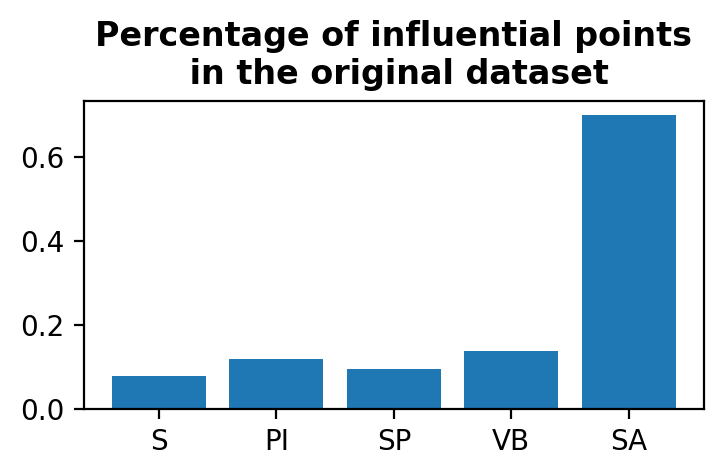

In [ ]:
plt.figure(figsize=(4,2))
plt.bar(c.index, c.values)
plt.title('Percentage of influential points\n in the original dataset')

Text(0.5, 1.0, 'influential points')

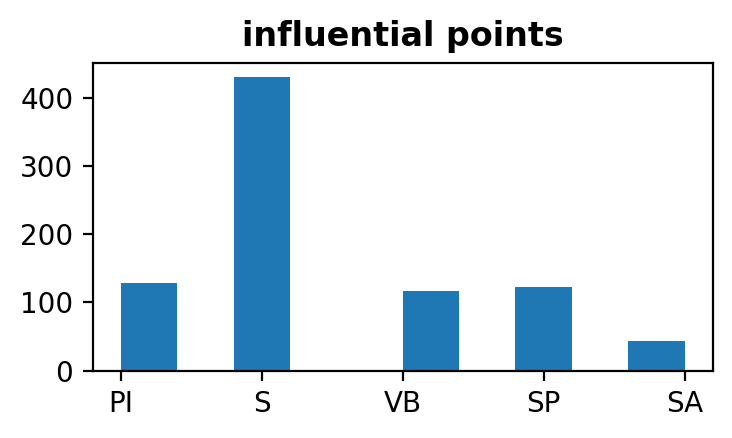

In [ ]:
# Among influential points there's a high proportion of Method'SA'. So some of the influential points may belong to a different group.
plt.figure(figsize=(4,2))
plt.hist(infl_data.Method)
plt.title('influential points')

Text(0.5, 1.0, 'data without influential points')

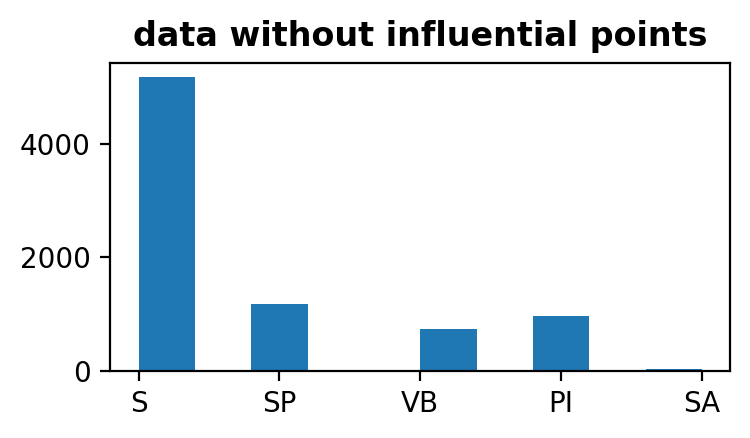

In [ ]:
plt.figure(figsize=(4,2))
plt.hist(df_without_infl_pt.Method)
plt.title('data without influential points')

Text(0.5, 1.0, 'original data')

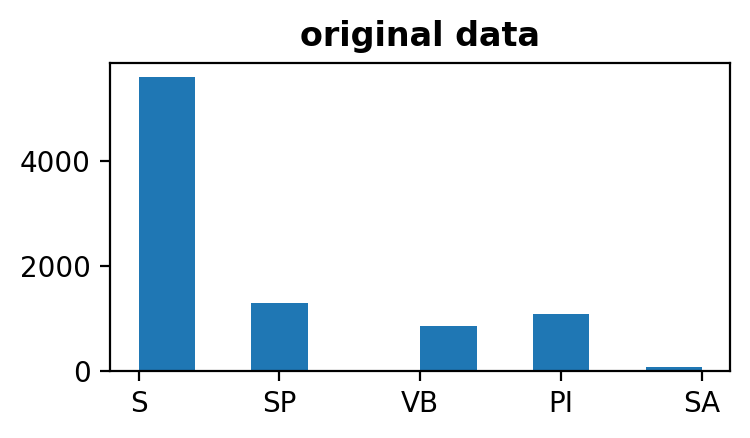

In [ ]:
plt.figure(figsize=(4,2))
plt.hist(origin_df.Method)
plt.title('original data')